# HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


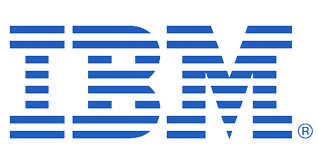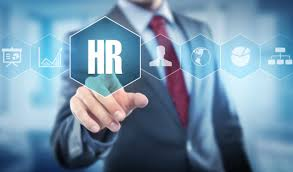

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

# Importing the DATASET

In [5]:
df=pd.read_csv("Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# Data Inspection

In [6]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [7]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

# Exploratory Data Analysis(EDA)

In [8]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Extracting the information about the dataset

# Statistical Summary

In [11]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

Describing the dataset to obtain - Count , Mean , Standard deviation , Mininmum , IQR , Maximum values.

# Data Description

In [12]:
#checking Dimension of Data
print("In our dataset we have {} rows & {} columns".format(*df.shape))
print('\n')

# Column Names in our Dataset
print("These are the columns present in our dataset: \n",df.columns)

In our dataset we have 1470 rows & 35 columns


These are the columns present in our dataset: 
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# Checking Datatypes

In [13]:
#Checking datatypes in our dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Observations:
Our dataframe comprises 1,470 rows and 35 columns.
The dataset contains two distinct datatypes.
Among these columns, 26 are of integer datatype, while 9 columns hold object values.
The memory usage exceeds 402.1+ kilobytes.

# Missing & Duplicate Values

In [14]:
# Checking for Missing values
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

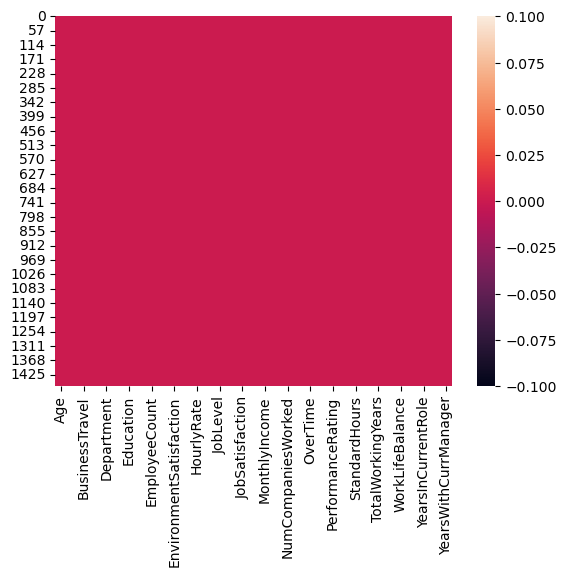

In [15]:
#Visualizing it
sns.heatmap(df.isnull())
plt.show()

In [18]:
# Checking for Duplicate values
df.duplicated().sum()

0

Missing Values: The dataset is devoid of any missing or null values.

Duplicate Values: No duplicate values present in our dataset

One very important observation that can be made from the provided data is that the "EmployeeCount" column has a constant value of 1. This means that all the records in the dataset have the same value for this feature, and it doesn't provide any meaningful information for analysis. As a result, this column can be safely removed from the dataset as it won't contribute to any insights or patterns.

Additionally, it is noticed that some of the columns like "StandardHours" & "Over18" have a constant value of 80 & "Y". This means that this feature also does not vary across the dataset and contains no useful information for analysis. Hence, it can also be removed from the dataset.

Also there is a column EmployeeNumber which is unique for every feature, This will not contributue to pridict Attrition, we can drop this as well

In [19]:
#Dropping columns
df.drop(columns=['EmployeeCount','StandardHours', 'EmployeeNumber', 'Over18'], axis=1, inplace=True)

In [20]:
print('After dropping we have {} rows & {} columns'.format(*df.shape))

After dropping we have 1470 rows & 31 columns


# Data Visualization

In [21]:
# Separating Numerical & Categorical columns

cat_col = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)
print("\n")

num_col = df.select_dtypes(include=['int64']).columns
print("Numerical columns are:",num_col)

Categorical columns are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


Numerical columns are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


# Univariate Analysis

In [22]:
#Unique Values in each columns in our dataset
df.nunique()             

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

# Univariate Analysis for Categrical columns

In [23]:
# Value Counts of categorical columns in our Dataframe
for i in cat_col:
    print(df[i].value_counts())
    print("\n")

No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


No     1054
Yes     416
Name: OverTime, dtype: int64




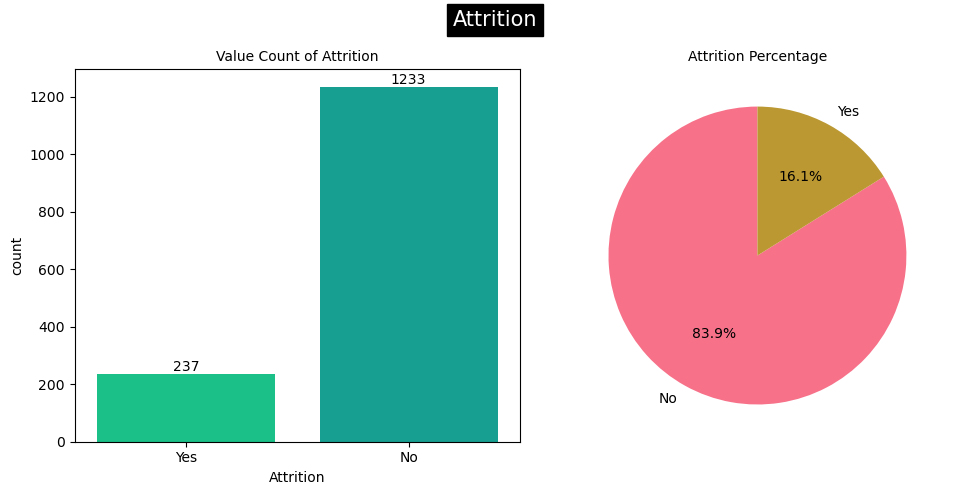

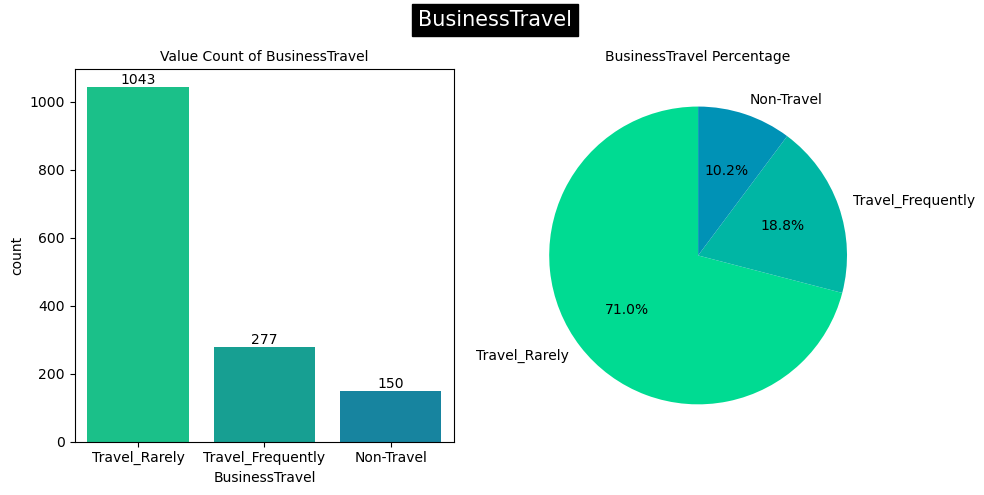

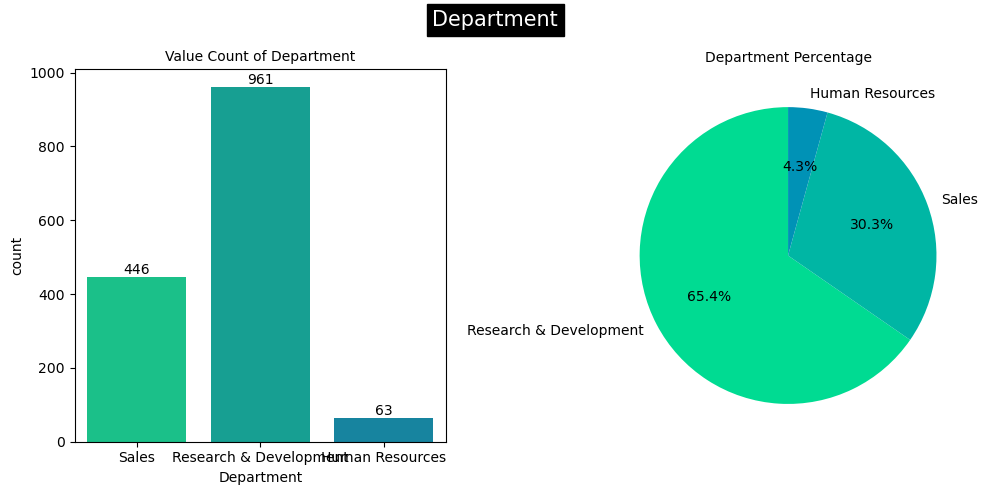

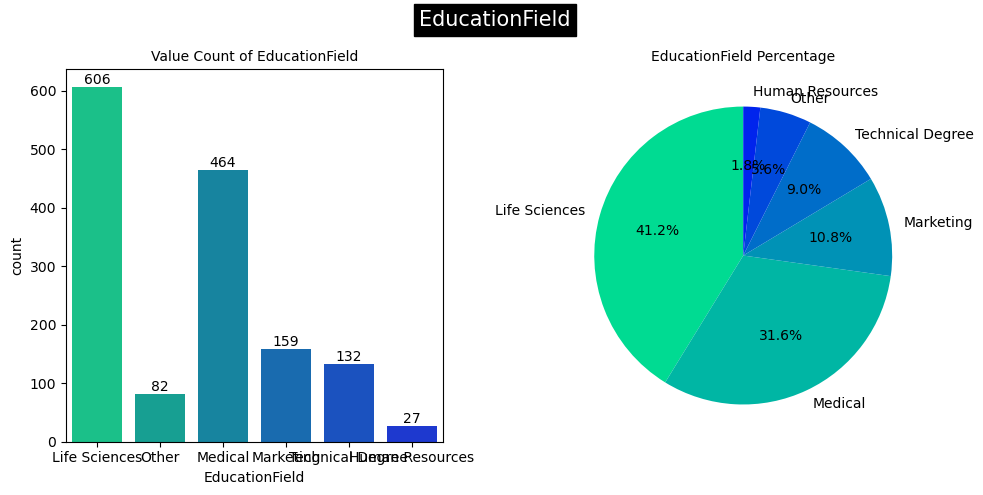

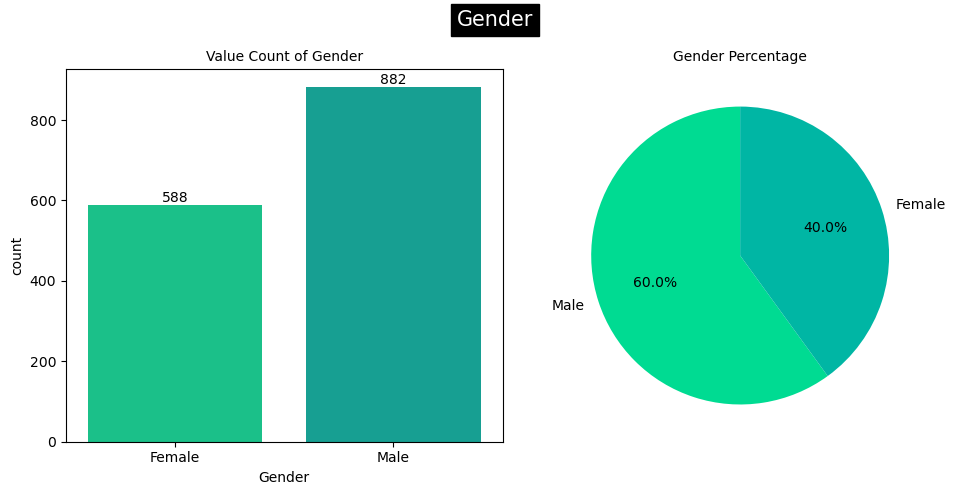

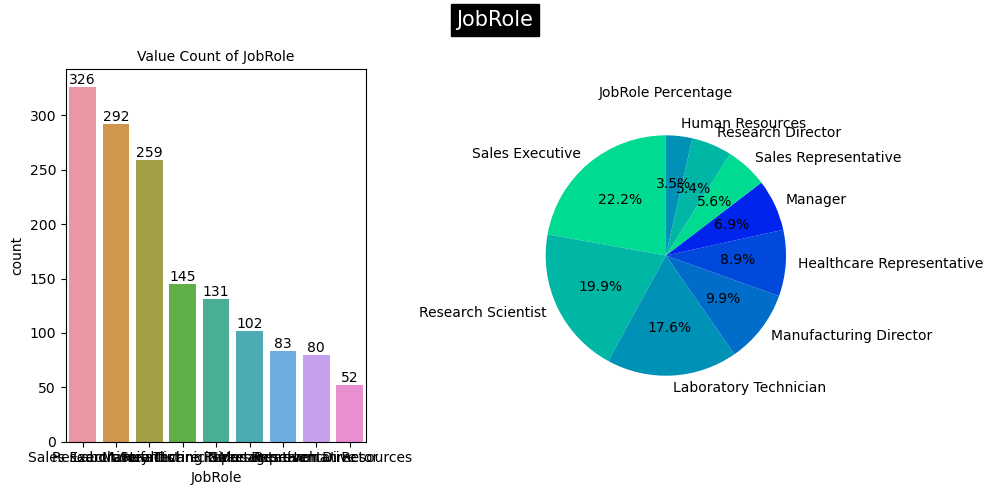

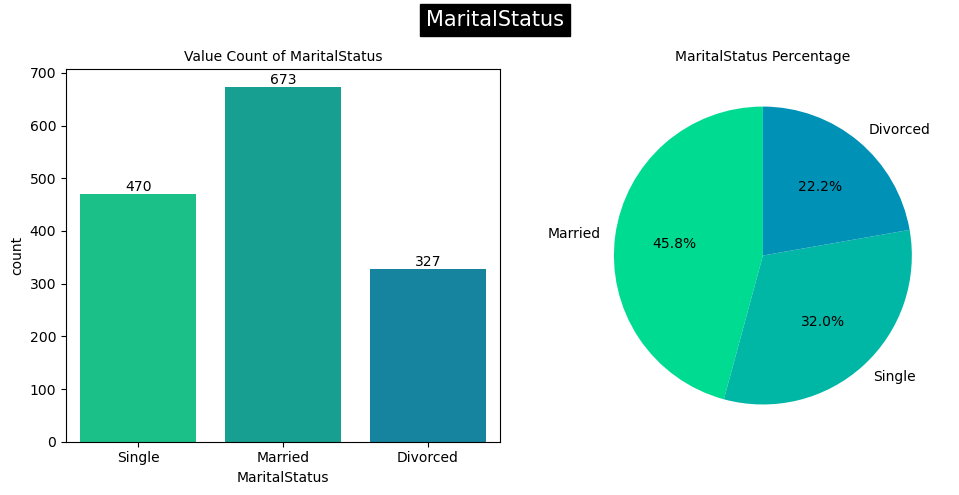

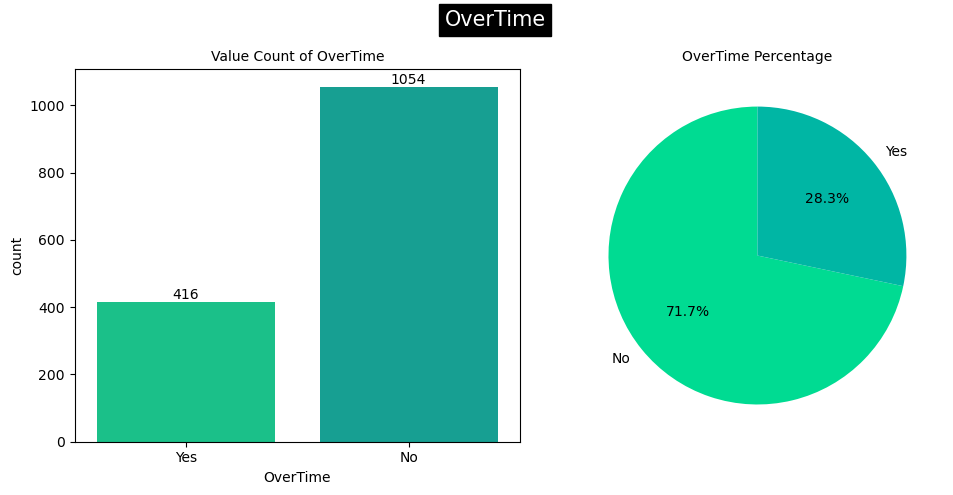

In [25]:
# Create a subplot layout with two subplots side by side

for i, column in enumerate(cat_col):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.set_palette("winter_r")
    
    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', startangle=90)
    ax.set_title(f'{column} Percentage', fontsize=10)
    
    fig.suptitle(column, fontsize=15, backgroundcolor='black',color='white')
    plt.tight_layout()
    plt.show()

These plots provide insights into the demographic and work-related characteristics of the employees in the dataset, which can be valuable for HR and management decision-making.



# Univariate Analysis of Numerical Columns

In [26]:
for i in num_col:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


3    453
4    446
2    287

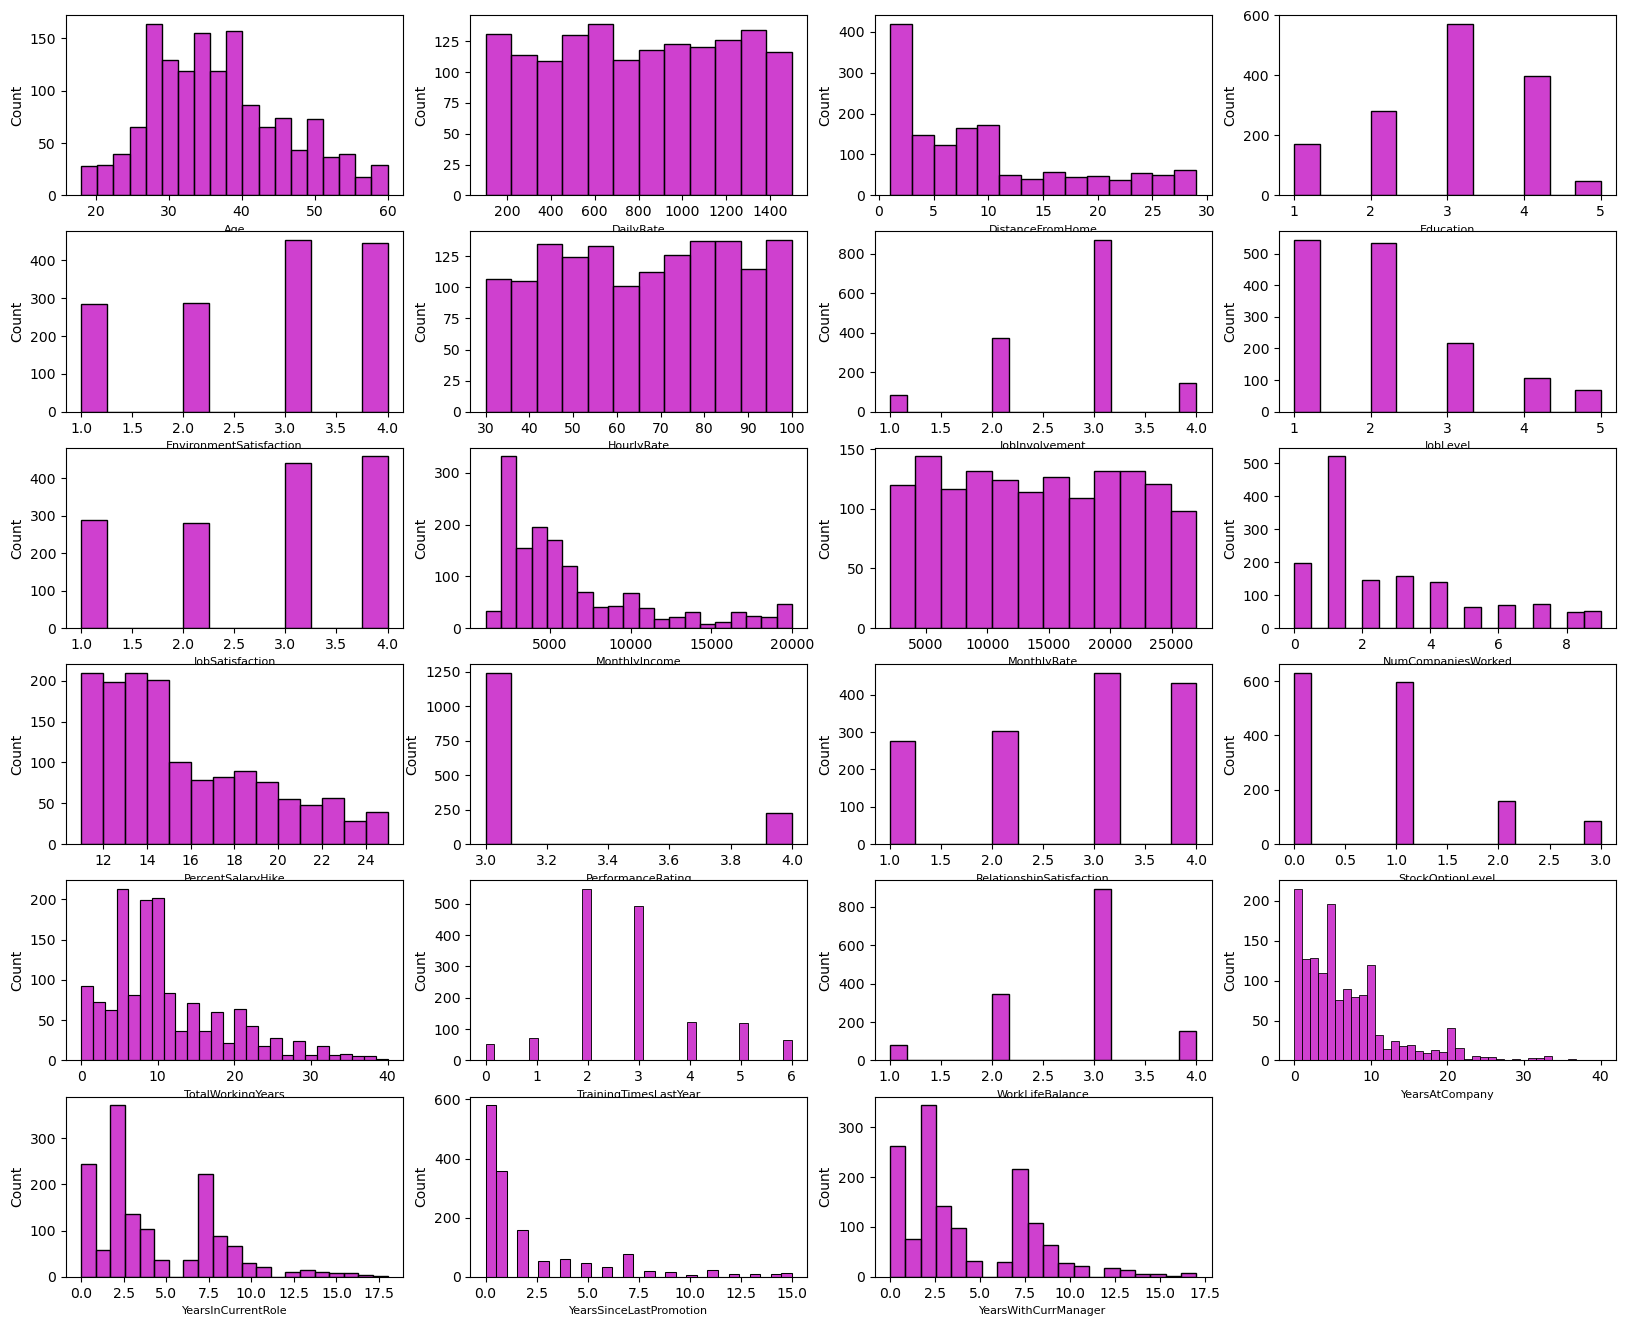

In [27]:
#Visiualizing it using Histogram
plt.figure(figsize=(20,22), facecolor='white')
plotnumber =1
for column in num_col:
    if plotnumber <=35:
        ax = plt.subplot(8,4,plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.tight_layout
plt.show()

# Bivariate Analysis

# Categorical Column vs Target

In [28]:
#Removing Attrition variable from categorical list
cat_col=cat_col[1:]

# Iterate through each categorical column
for col in cat_col:
    
    # Group by 'Attrition' and the current categorical column
    attrition_counts = df.groupby(['Attrition', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Attrition'].count()
    
    # Calculate the percentage of 'Attrition' for each category in the current column
    attrition_percentages = (attrition_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    attrition_df = pd.concat([attrition_counts, attrition_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(attrition_df)
    print('*'*60)

                             Count  Percentage
Attrition BusinessTravel                      
No        Non-Travel           138       92.00
          Travel_Frequently    208       75.09
          Travel_Rarely        887       85.04
Yes       Non-Travel            12        8.00
          Travel_Frequently     69       24.91
          Travel_Rarely        156       14.96
************************************************************
                                  Count  Percentage
Attrition Department                               
No        Human Resources            51       80.95
          Research & Development    828       86.16
          Sales                     354       79.37
Yes       Human Resources            12       19.05
          Research & Development    133       13.84
          Sales                      92       20.63
************************************************************
                            Count  Percentage
Attrition EducationField                

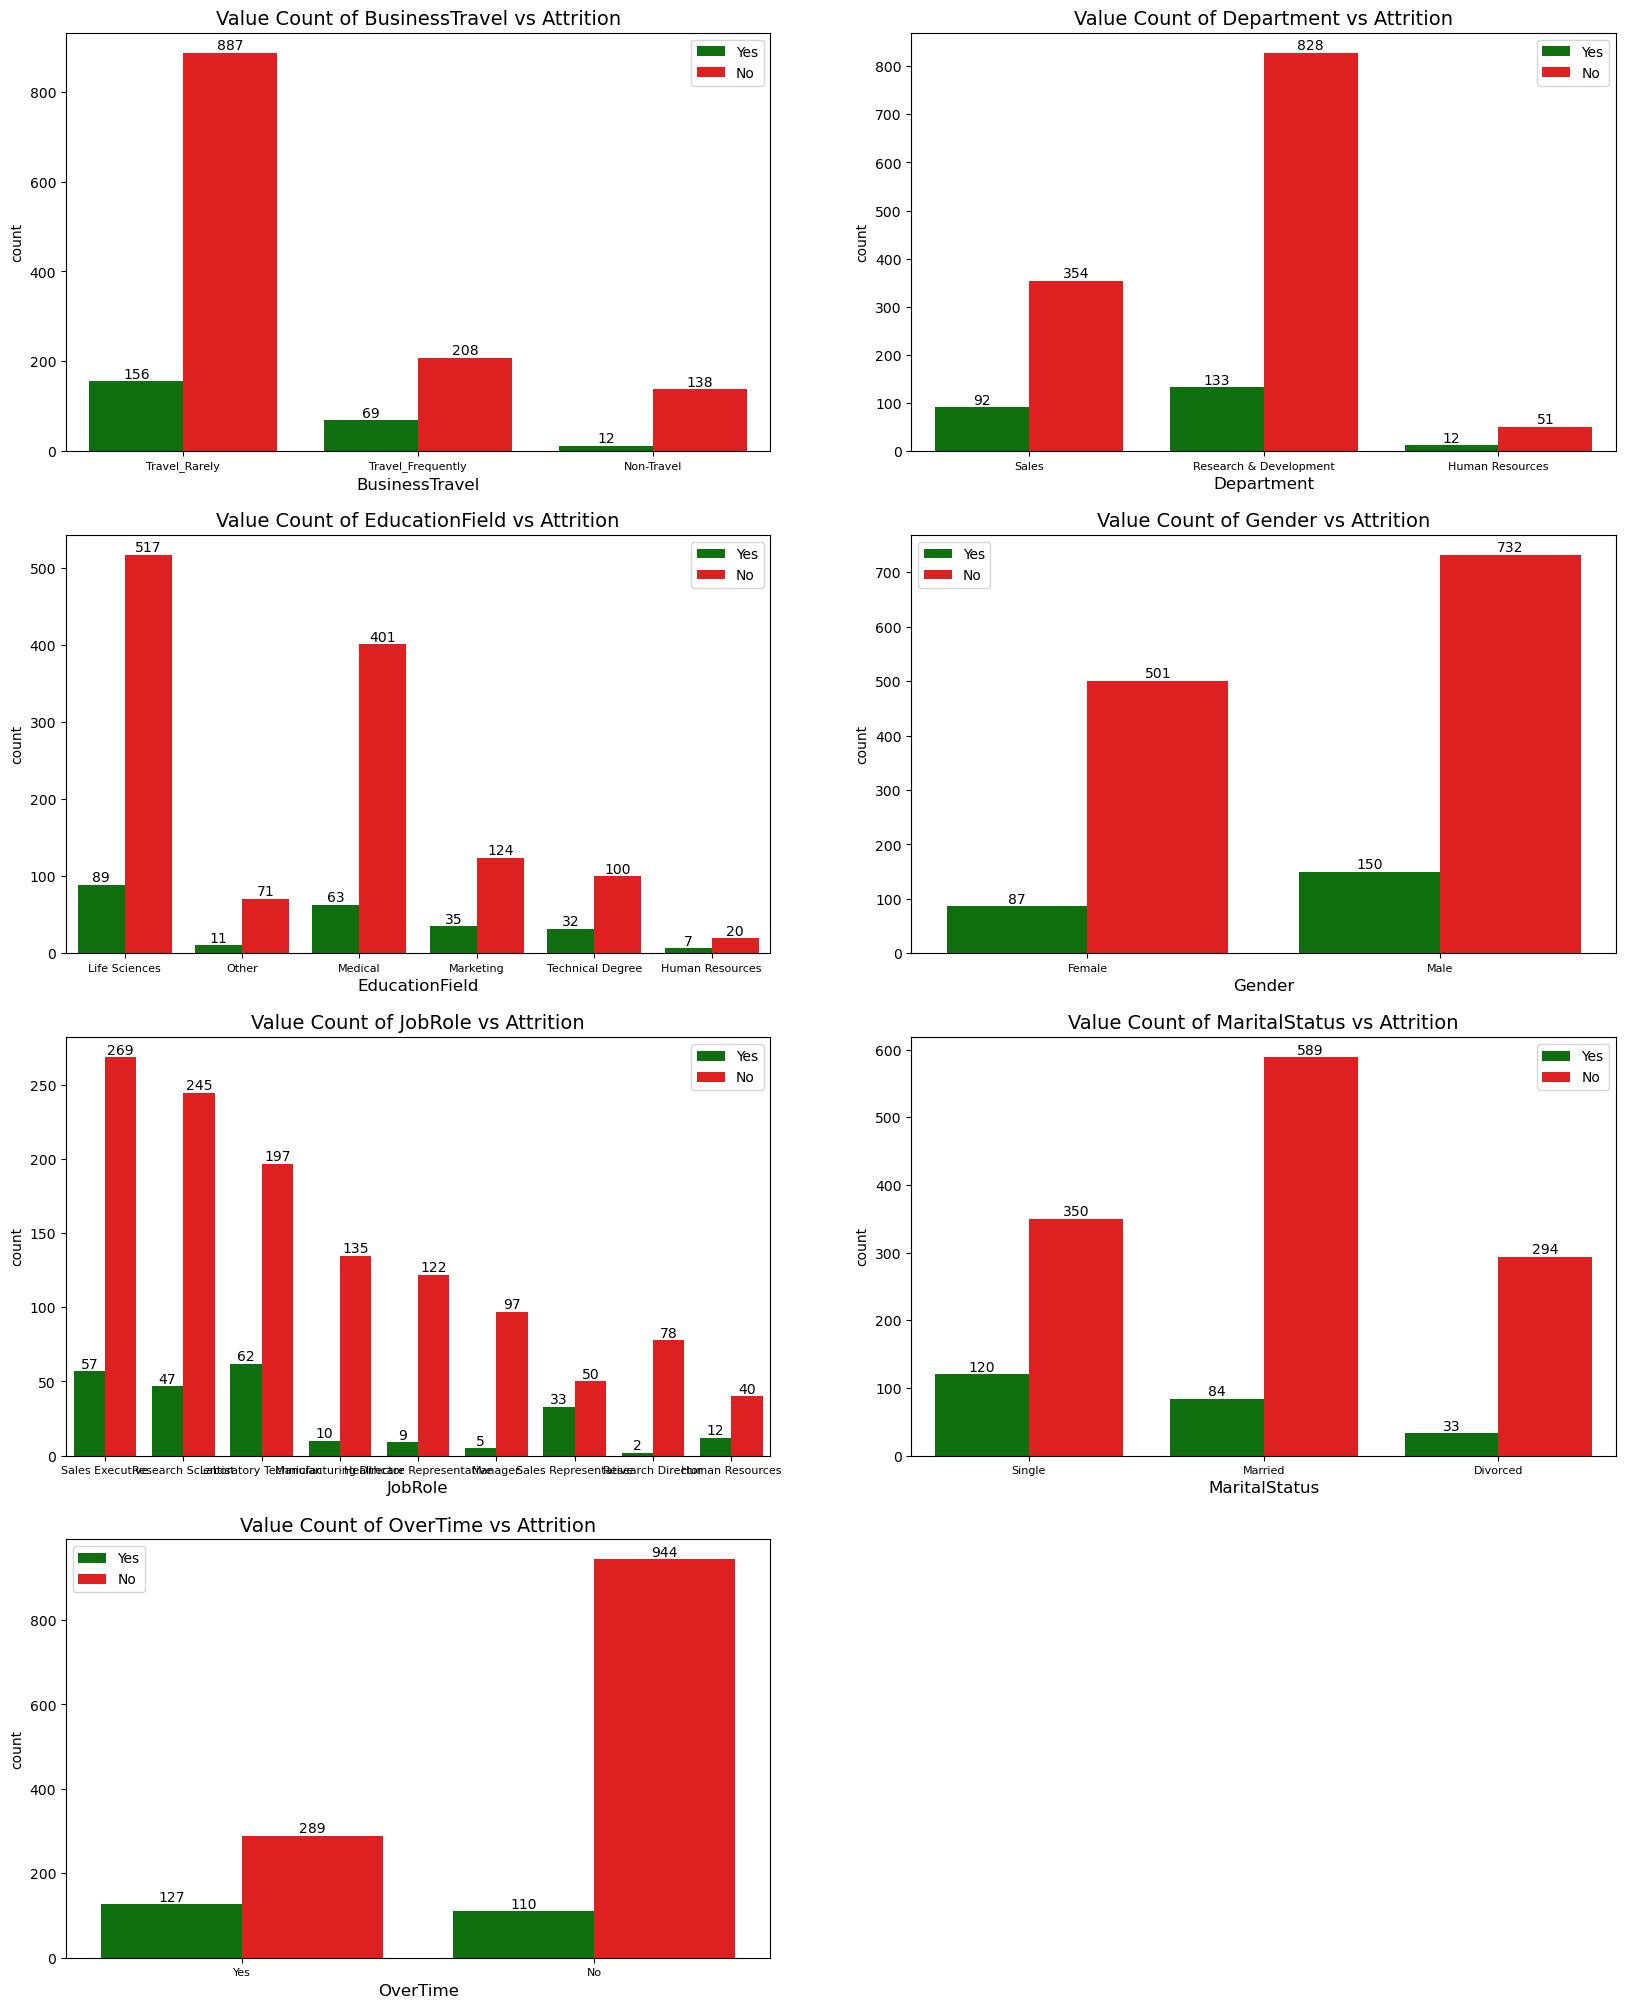

In [31]:
# Visualization of Categorical column Vs Attrition
plt.figure(figsize=(20,25))
p=1

for i in cat_col:
    if p<=8:
        plt.subplot(4,2,p)
        custom_palette = {"Yes": "g", "No": "r"} ## Define a custom color palette
        ax= sns.countplot(x=i, hue='Attrition',data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Attrition', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p+=1
plt.show()

# The plots shows that attrition rates are affected by whether employees work overtime or not. Those who work overtime tend to have higher attrition rates.

# Numerical Column vs Target

In [32]:
num_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [33]:
# Iterate through each categorical column
for col in num_col:
    # Group by 'Attrition' and the current categorical column
    attrition_counts = df.groupby(['Attrition', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Attrition'].count()
    
    # Calculate the percentage of 'Attrition' for each category in the current column
    attrition_percentages = (attrition_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    attrition_df = pd.concat([attrition_counts, attrition_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(attrition_df)
    print('\n')

               Count  Percentage
Attrition Age                   
No        18       4       50.00
          19       3       33.33
          20       5       45.45
          21       7       53.85
          22      11       68.75
...              ...         ...
Yes       52       3       16.67
          53       2       10.53
          55       3       13.64
          56       3       21.43
          58       5       35.71

[82 rows x 2 columns]


                     Count  Percentage
Attrition DailyRate                   
No        102            1      100.00
          105            1      100.00
          106            1      100.00
          107            1      100.00
          111            3      100.00
...                    ...         ...
Yes       1474           1       50.00
          1475           2      100.00
          1479           1       50.00
          1485           1       33.33
          1496           1       50.00

[1021 rows x 2 columns]


            

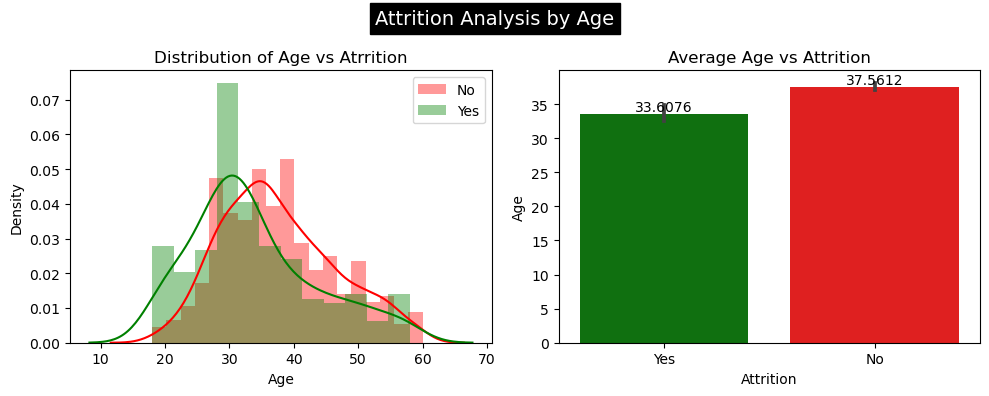

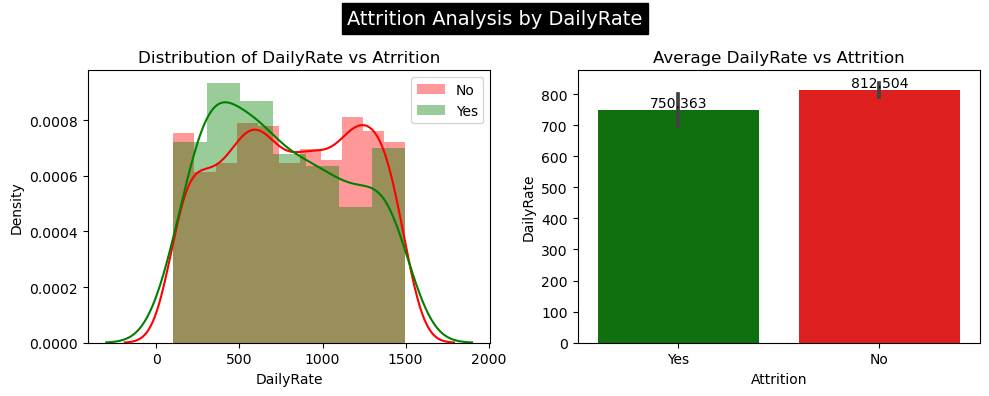

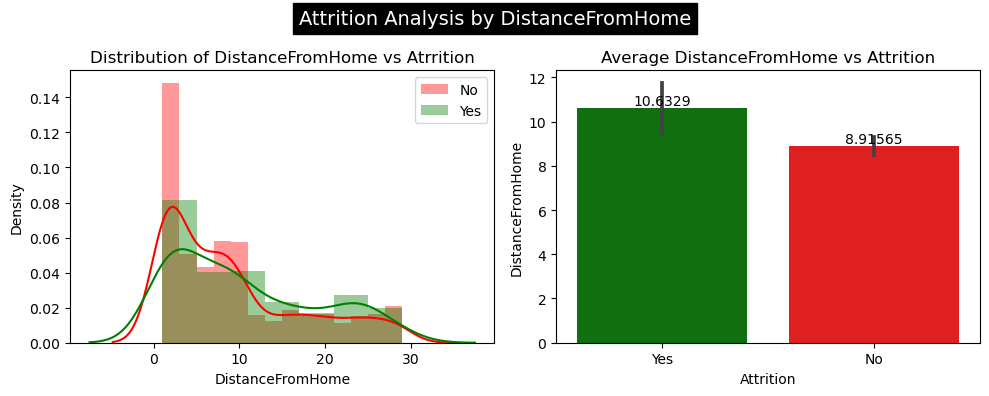

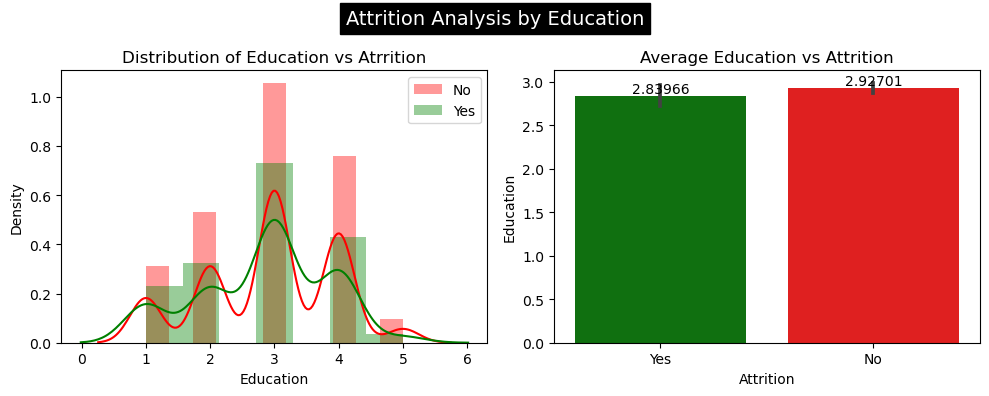

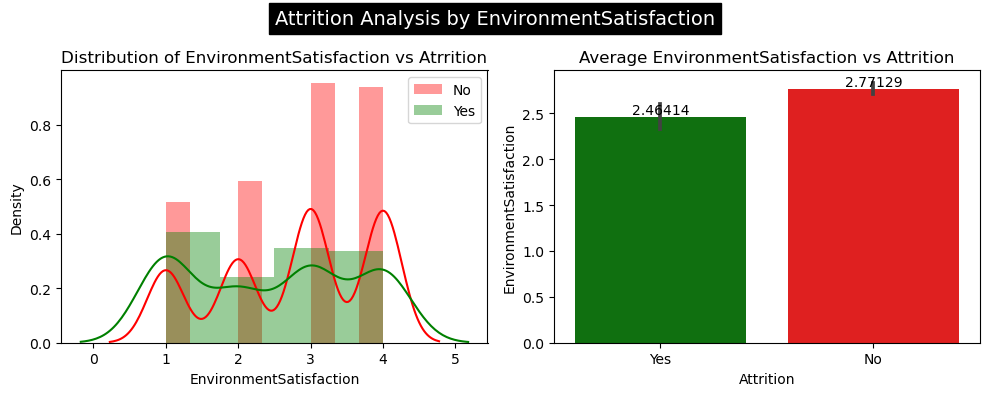

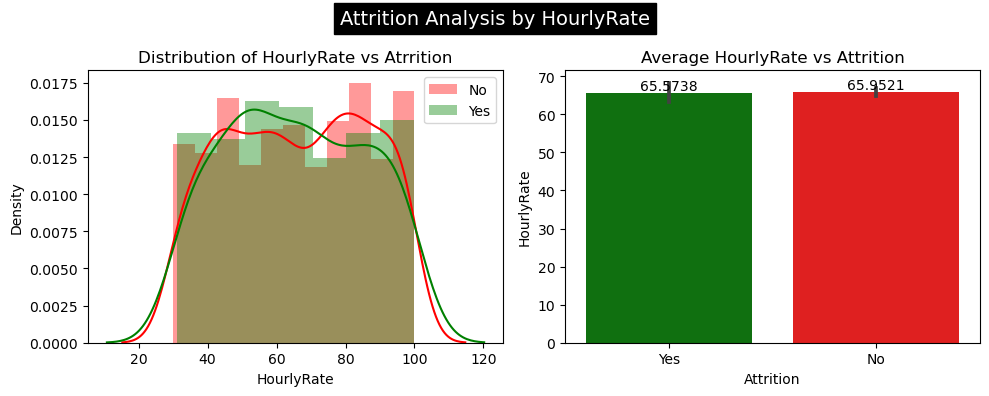

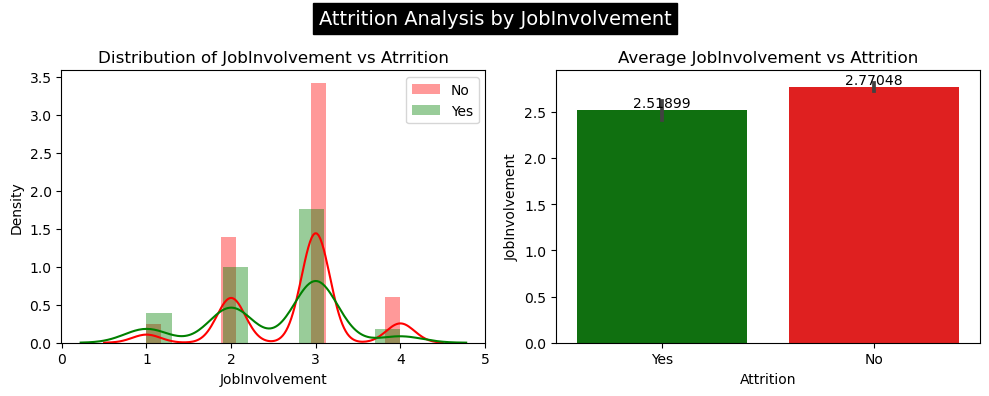

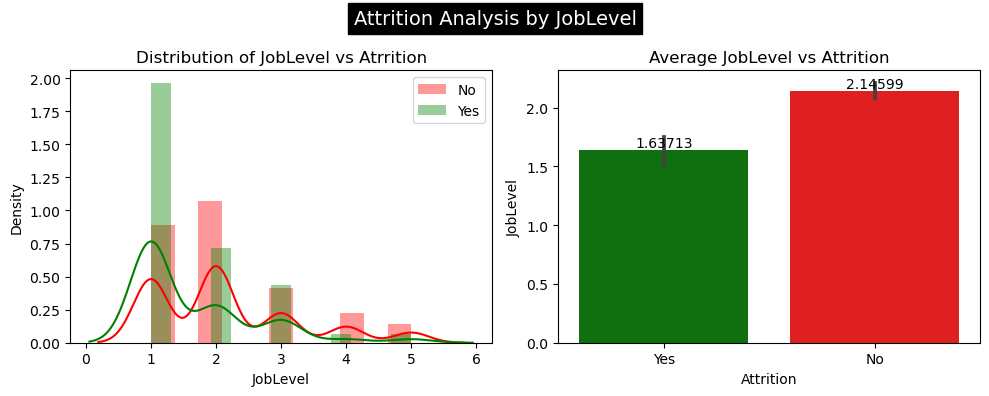

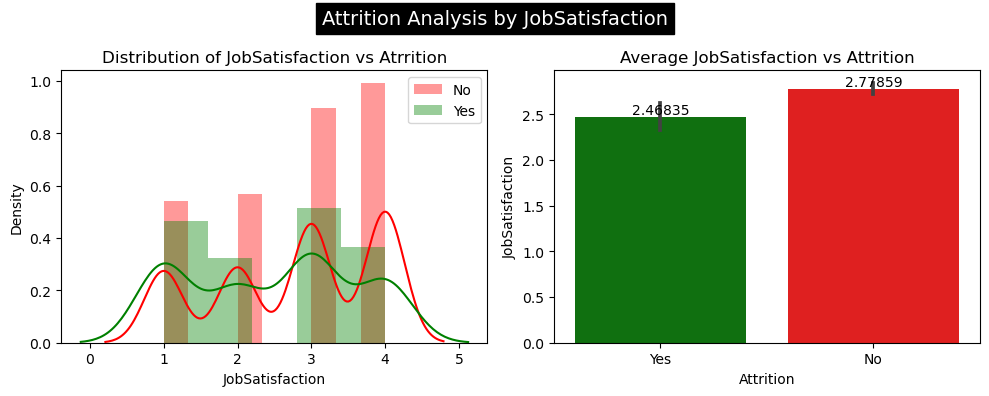

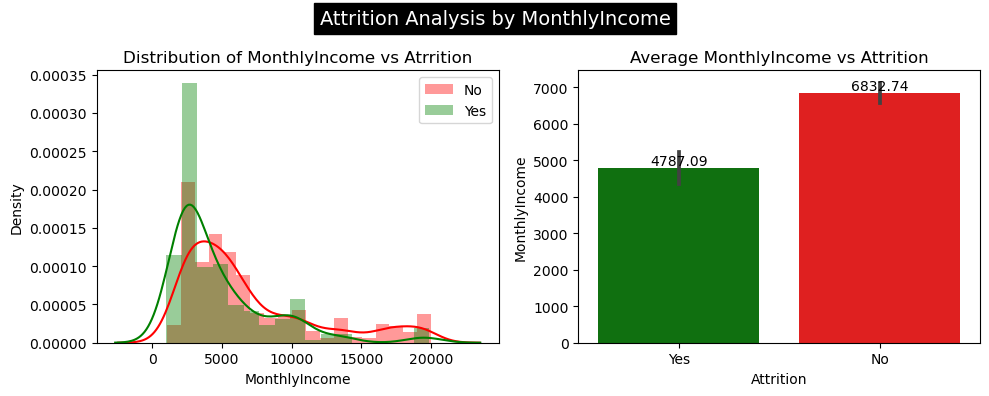

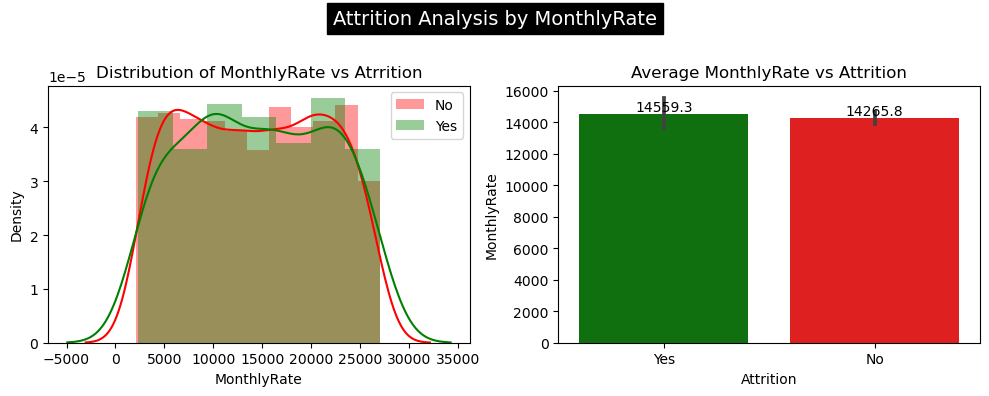

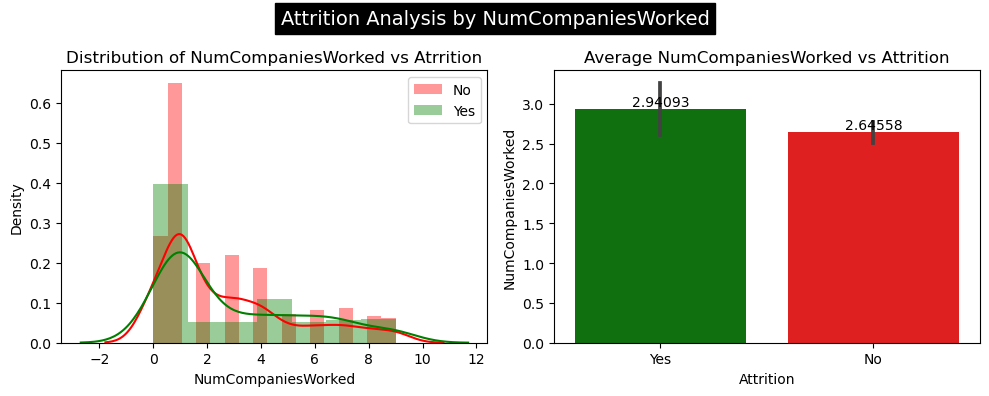

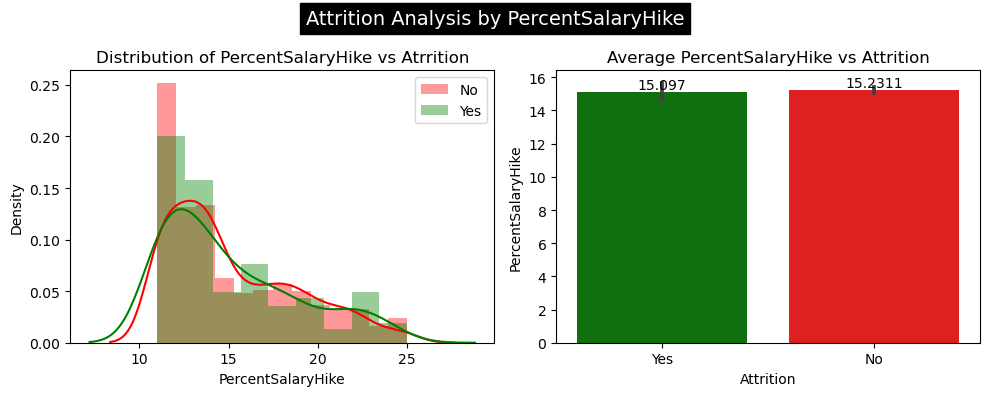

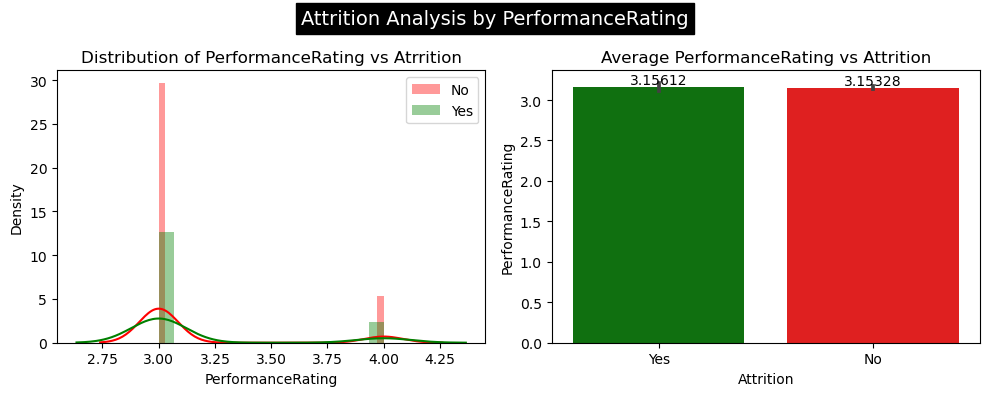

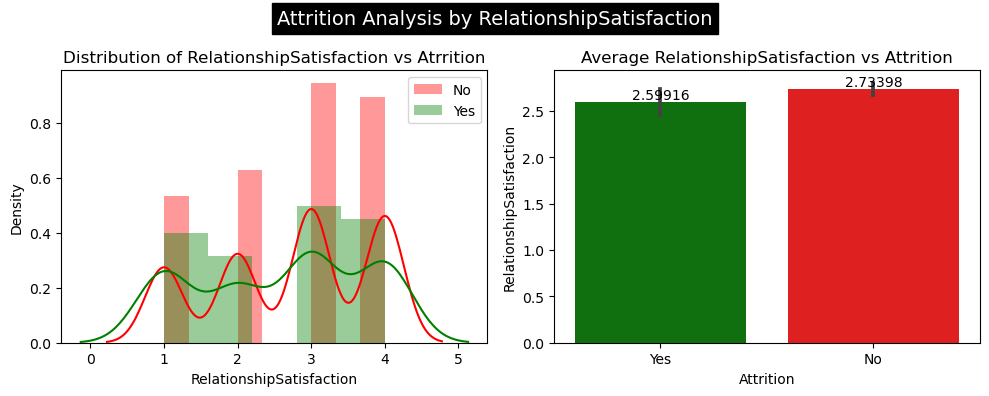

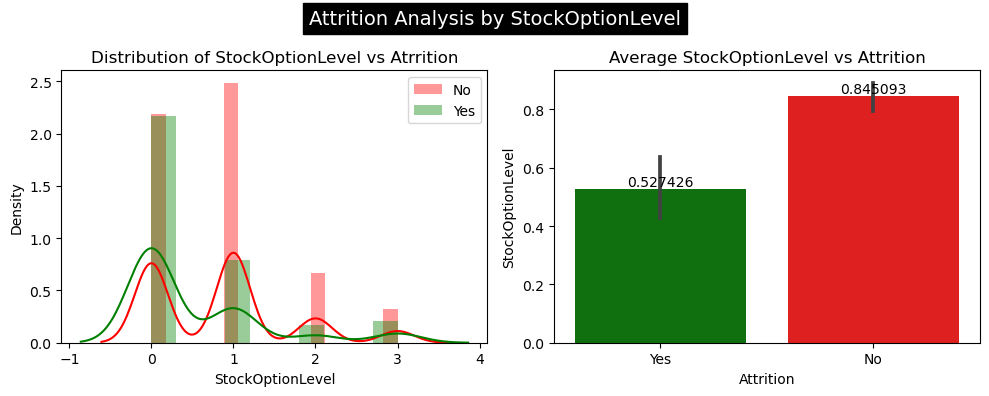

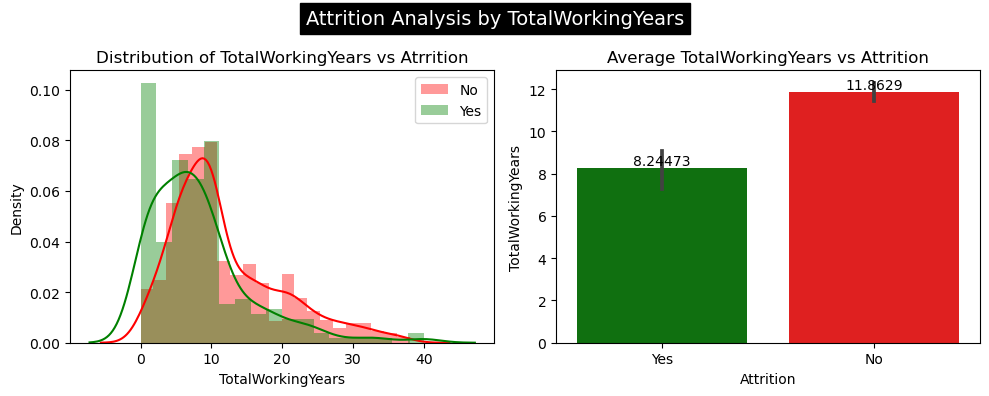

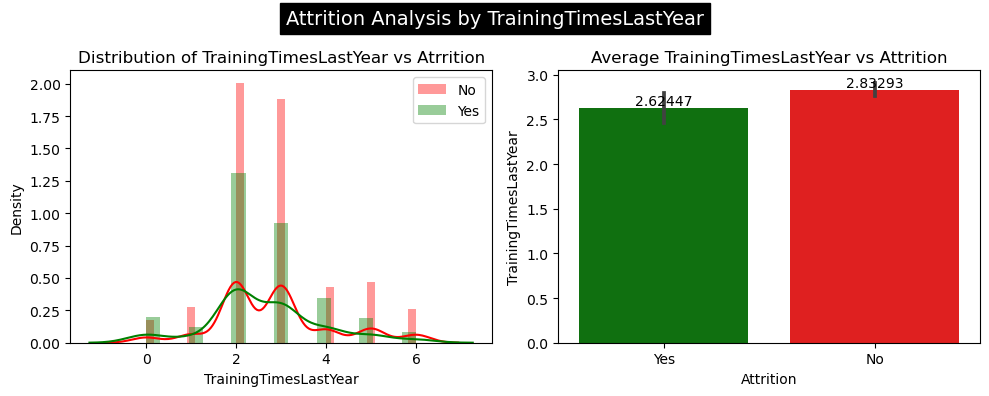

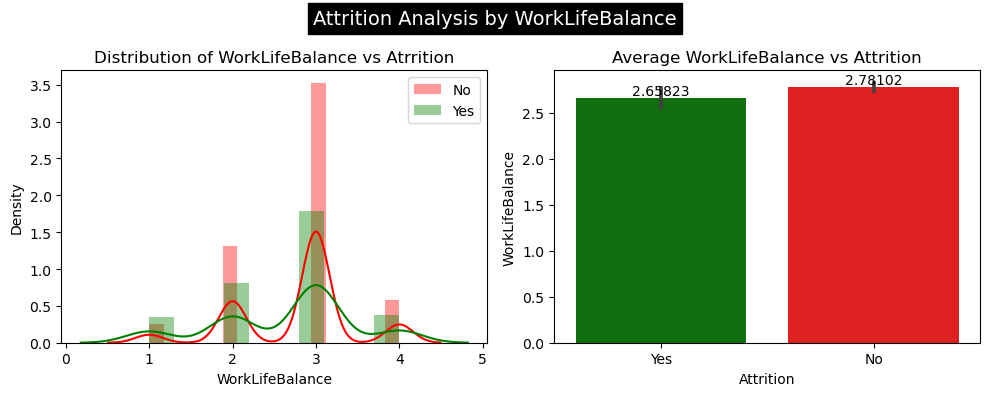

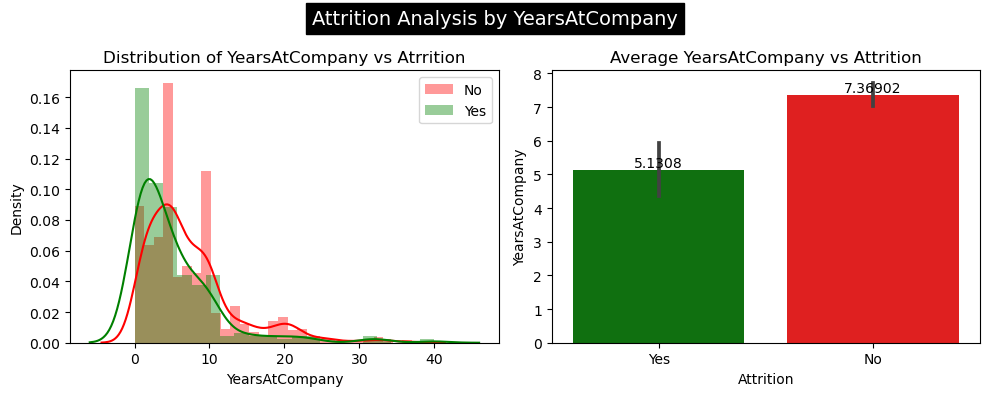

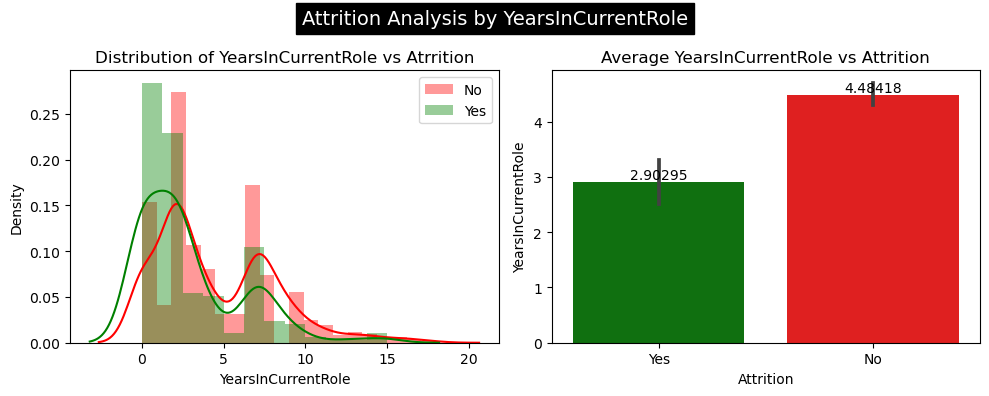

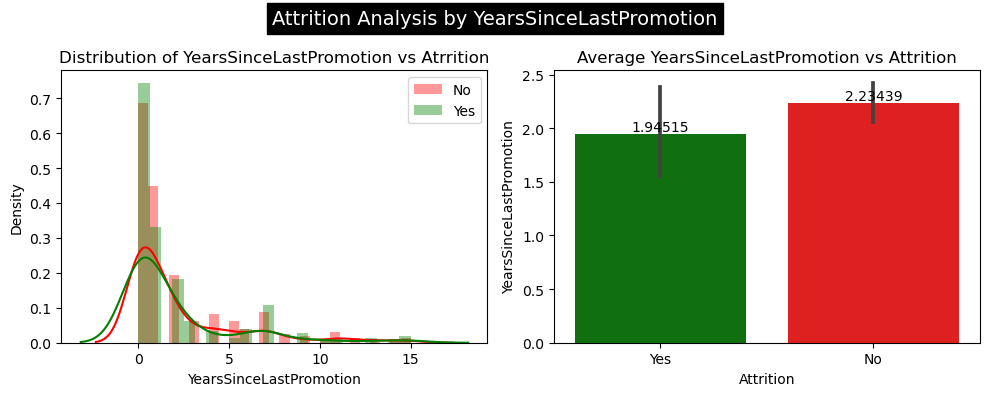

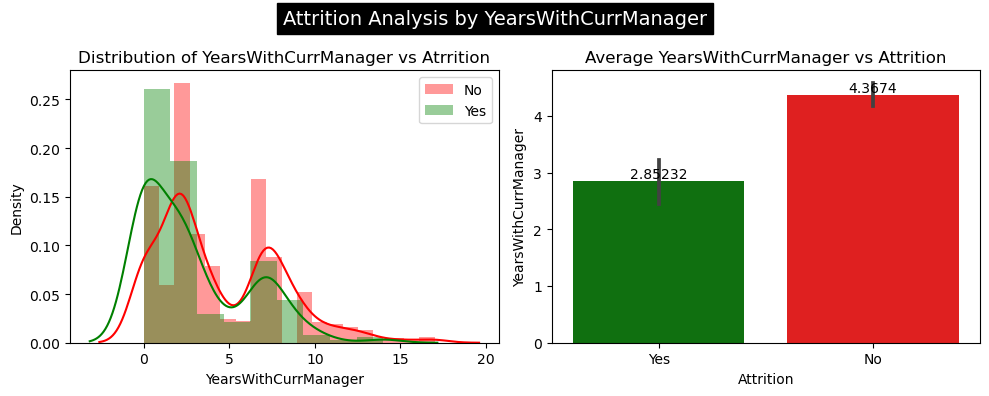

In [34]:
#Visualizing it using it
for i in num_col:
    
    #create Subplots
    fig, axes =plt.subplots(1,2,figsize=(10,4))
    
    # First Plot: Distribution of Numerical columns vs Atrrition
    sns.distplot(df[df['Attrition']=='No'][i], label= "No", color='r', ax=axes[0])
    sns.distplot(df[df['Attrition']=='Yes'][i],label="Yes", color='g', ax=axes[0])
    axes[0].set_title(f"Distribution of {i} vs Atrrition")
    axes[0].legend()
    
    # Second Plot: Avg. Numerical columns vs Attrition
    ax=sns.barplot(x='Attrition', y=i, data=df, palette={'Yes': "g", 'No': "r"}, ax=axes[1])
    for container in ax.containers:
        ax.bar_label(container)
    axes[1].set_title(f'Average {i} vs Attrition')
    
    fig.suptitle(f"Attrition Analysis by {i}", fontsize=14, backgroundcolor='black',color='white')  # Add a specific title for this column
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Show the plots
    plt.show()

Overall, the data suggests that several factors, including age, job satisfaction, education level, and work-related factors, play a role in employee attrition. These insights can be valuable for HR and management to make informed decisions and address attrition issues.

# Multivariate analysis

# Attrition by Age & MonthlyIncome

<Figure size 500x1000 with 0 Axes>

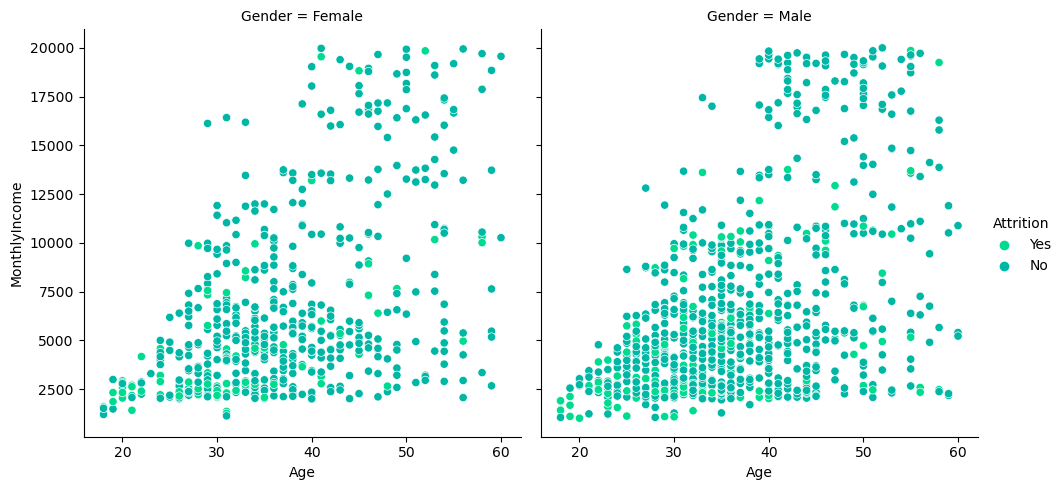

In [35]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

# Attrition by Marital Status and Monthly Income

In [36]:
# Comparing MaritalStatus vs MonthlyIncome
print(df.groupby('MaritalStatus')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by MaritalStatus and Monthly Income
stat_income = df.groupby(['Attrition', 'MaritalStatus'])['MonthlyIncome'].mean().reset_index()
print(stat_income)

  MaritalStatus  MonthlyIncome
0      Divorced    6786.287462
1       Married    6793.671620
2        Single    5889.472340 

  Attrition MaritalStatus  MonthlyIncome
0        No      Divorced    7071.455782
1        No       Married    6969.779287
2        No        Single    6401.600000
3       Yes      Divorced    4245.696970
4       Yes       Married    5558.821429
5       Yes        Single    4395.766667


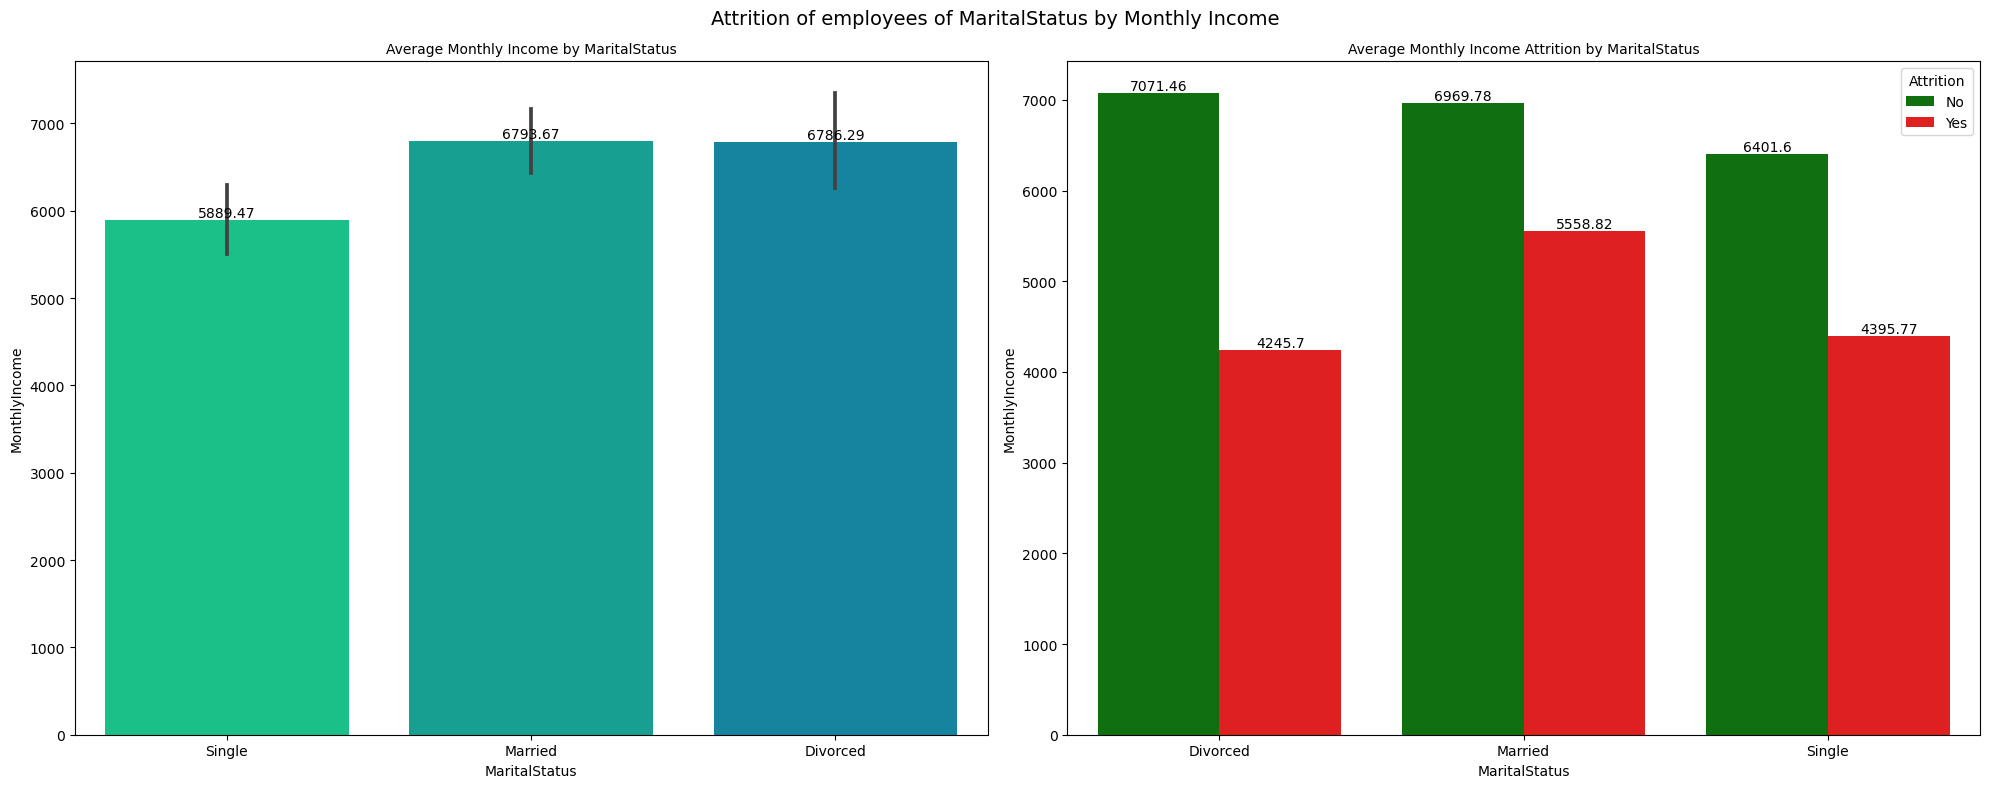

In [37]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing MaritalStatus by Monthly Income
ax = sns.barplot(x='MaritalStatus', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by MaritalStatus', fontsize=10)

# Second Plot: Attrition Rate of MaritalStatus by Salary
ax = sns.barplot(y='MonthlyIncome', x='MaritalStatus', hue='Attrition', data=stat_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by MaritalStatus', fontsize=10)

fig.suptitle("Attrition of employees of MaritalStatus by Monthly Income", fontsize=14)
plt.tight_layout()
plt.show()

# Attrition of Departmentby MonthlyIncome

In [38]:
# Comparing Department vs MonthlyIncome
print(df.groupby('Department')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by Department and Monthly Income
dept_income = df.groupby(['Attrition', 'Department'])['MonthlyIncome'].mean().reset_index()
print(dept_income)

               Department  MonthlyIncome
0         Human Resources    6654.507937
1  Research & Development    6281.252862
2                   Sales    6959.172646 

  Attrition              Department  MonthlyIncome
0        No         Human Resources    7345.980392
1        No  Research & Development    6630.326087
2        No                   Sales    7232.240113
3       Yes         Human Resources    3715.750000
4       Yes  Research & Development    4108.075188
5       Yes                   Sales    5908.456522


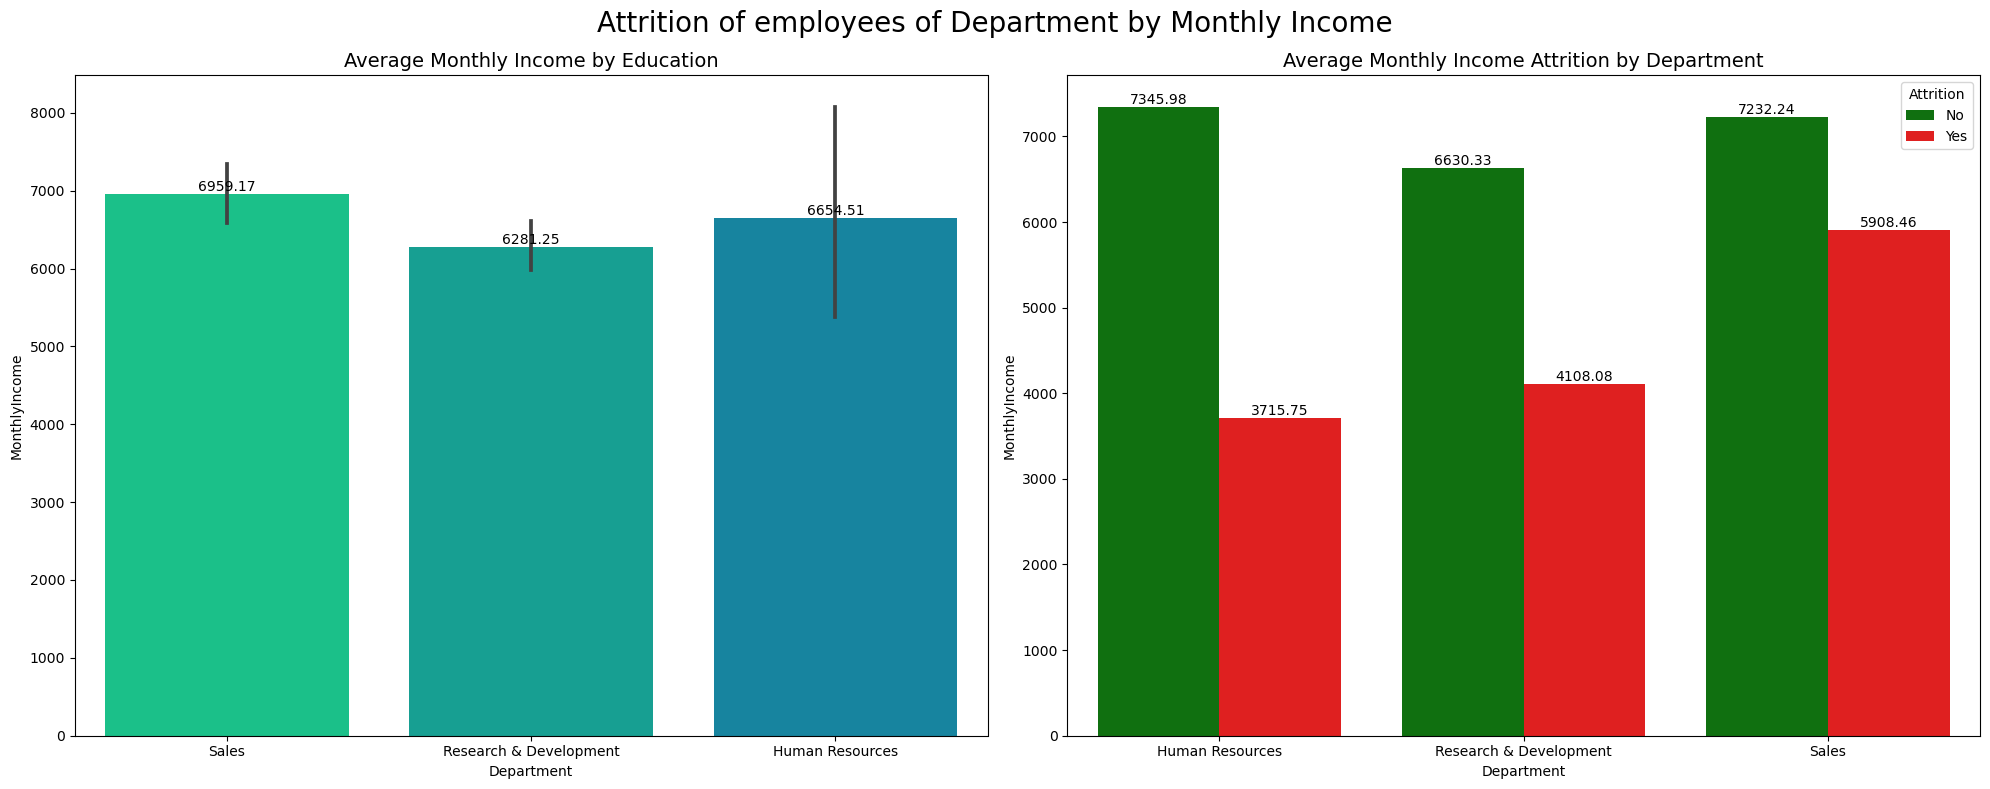

In [39]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing Department by Monthly Income
ax = sns.barplot(x='Department', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Education', fontsize=14)

# Second Plot: Attrition Rate of Department by Salary
ax = sns.barplot(y='MonthlyIncome', x='Department', hue='Attrition', data=dept_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by Department', fontsize=14)

fig.suptitle("Attrition of employees of Department by Monthly Income", fontsize=20)
plt.tight_layout()
plt.show()

# Attrition by Education and Monthly Income

In [41]:
# Comparing Education vs MonthlyIncome
print(df.groupby('Education')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobRole and Monthly Income
edu_income = df.groupby(['Attrition', 'Education'])['MonthlyIncome'].mean().reset_index()
print(edu_income)

   Education  MonthlyIncome
0          1    5640.570588
1          2    6226.645390
2          3    6517.263986
3          4    6832.402010
4          5    8277.645833 

  Attrition  Education  MonthlyIncome
0        No          1    5926.129496
1        No          2    6586.058824
2        No          3    6882.919662
3        No          4    7087.814706
4        No          5    8559.906977
5       Yes          1    4360.161290
6       Yes          2    4282.545455
7       Yes          3    4770.242424
8       Yes          4    5335.155172
9       Yes          5    5850.200000


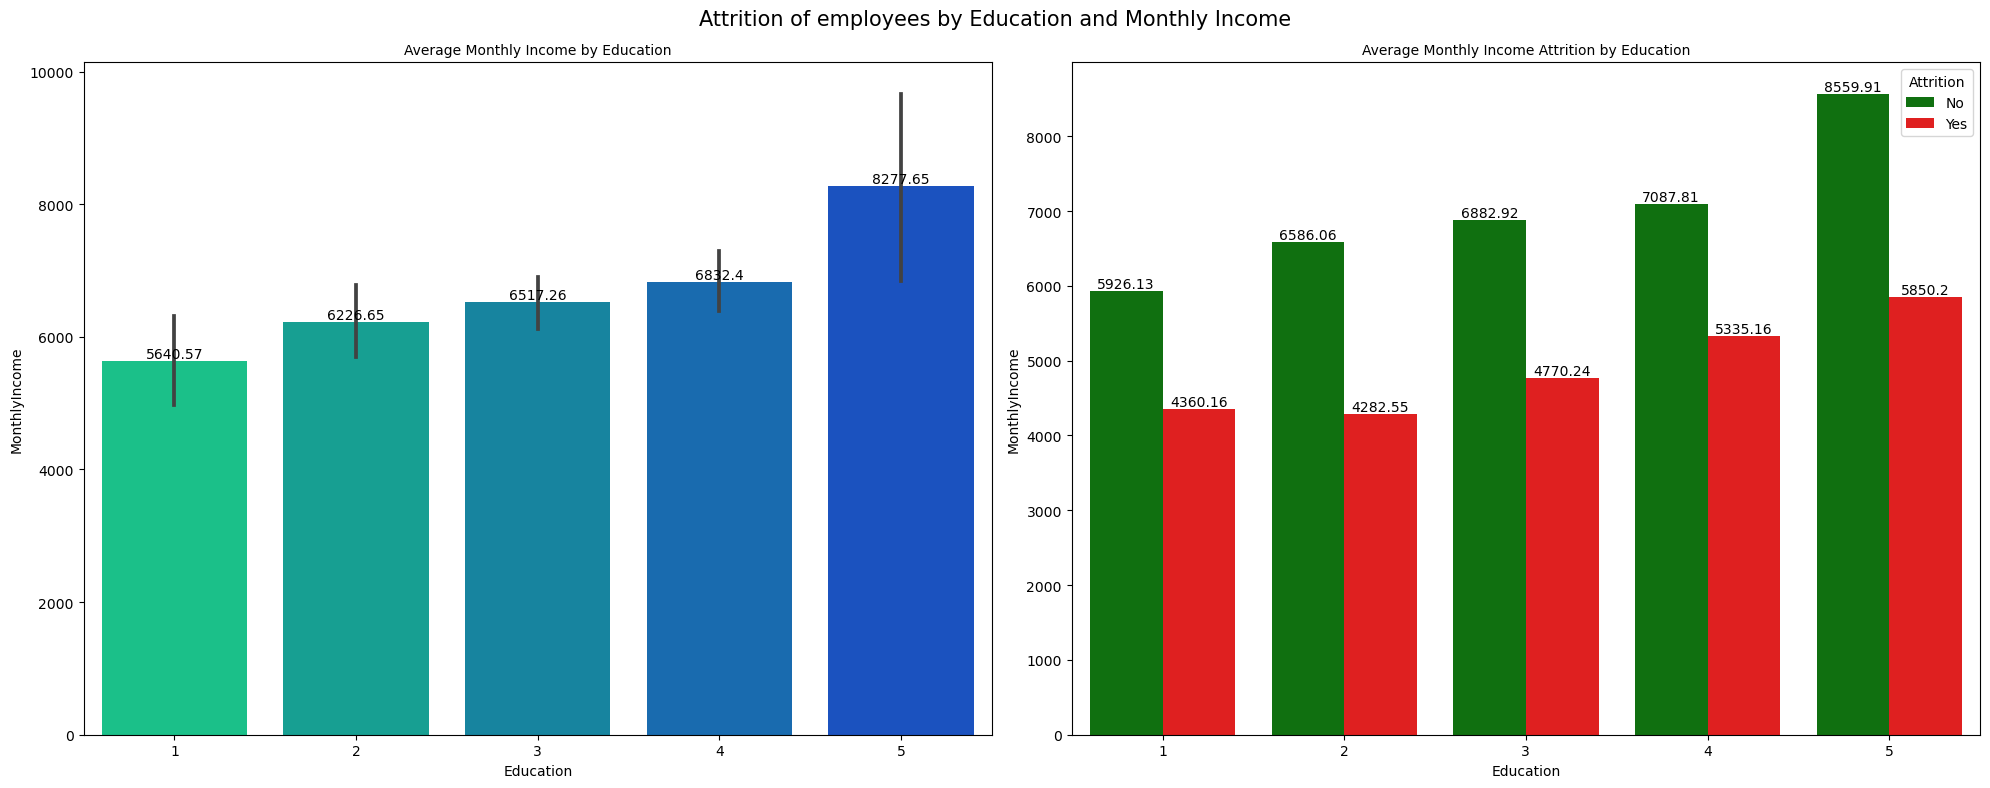

In [42]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing Education by Monthly Income
ax = sns.barplot(x='Education', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Education', fontsize=10)

# Second Plot: Attrition Rate by Education and Salary
ax = sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=edu_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by Education', fontsize=10)

fig.suptitle("Attrition of employees by Education and Monthly Income", fontsize=15)
plt.tight_layout()
plt.show()

# Attrition by Job Role and Monthly Income

In [43]:
# Comparing JobRole vs MonthlyIncome
print(df.groupby('JobRole')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobRole and Monthly Income
jobrole_income = df.groupby(['Attrition', 'JobRole'])['MonthlyIncome'].mean().reset_index()
print(jobrole_income)

                     JobRole  MonthlyIncome
0  Healthcare Representative    7528.763359
1            Human Resources    4235.750000
2      Laboratory Technician    3237.169884
3                    Manager   17181.676471
4     Manufacturing Director    7295.137931
5          Research Director   16033.550000
6         Research Scientist    3239.972603
7            Sales Executive    6924.279141
8       Sales Representative    2626.000000 

   Attrition                    JobRole  MonthlyIncome
0         No  Healthcare Representative    7453.557377
1         No            Human Resources    4391.750000
2         No      Laboratory Technician    3337.223350
3         No                    Manager   17201.484536
4         No     Manufacturing Director    7289.925926
5         No          Research Director   15947.346154
6         No         Research Scientist    3328.122449
7         No            Sales Executive    6804.617100
8         No       Sales Representative    2798.440000
9       

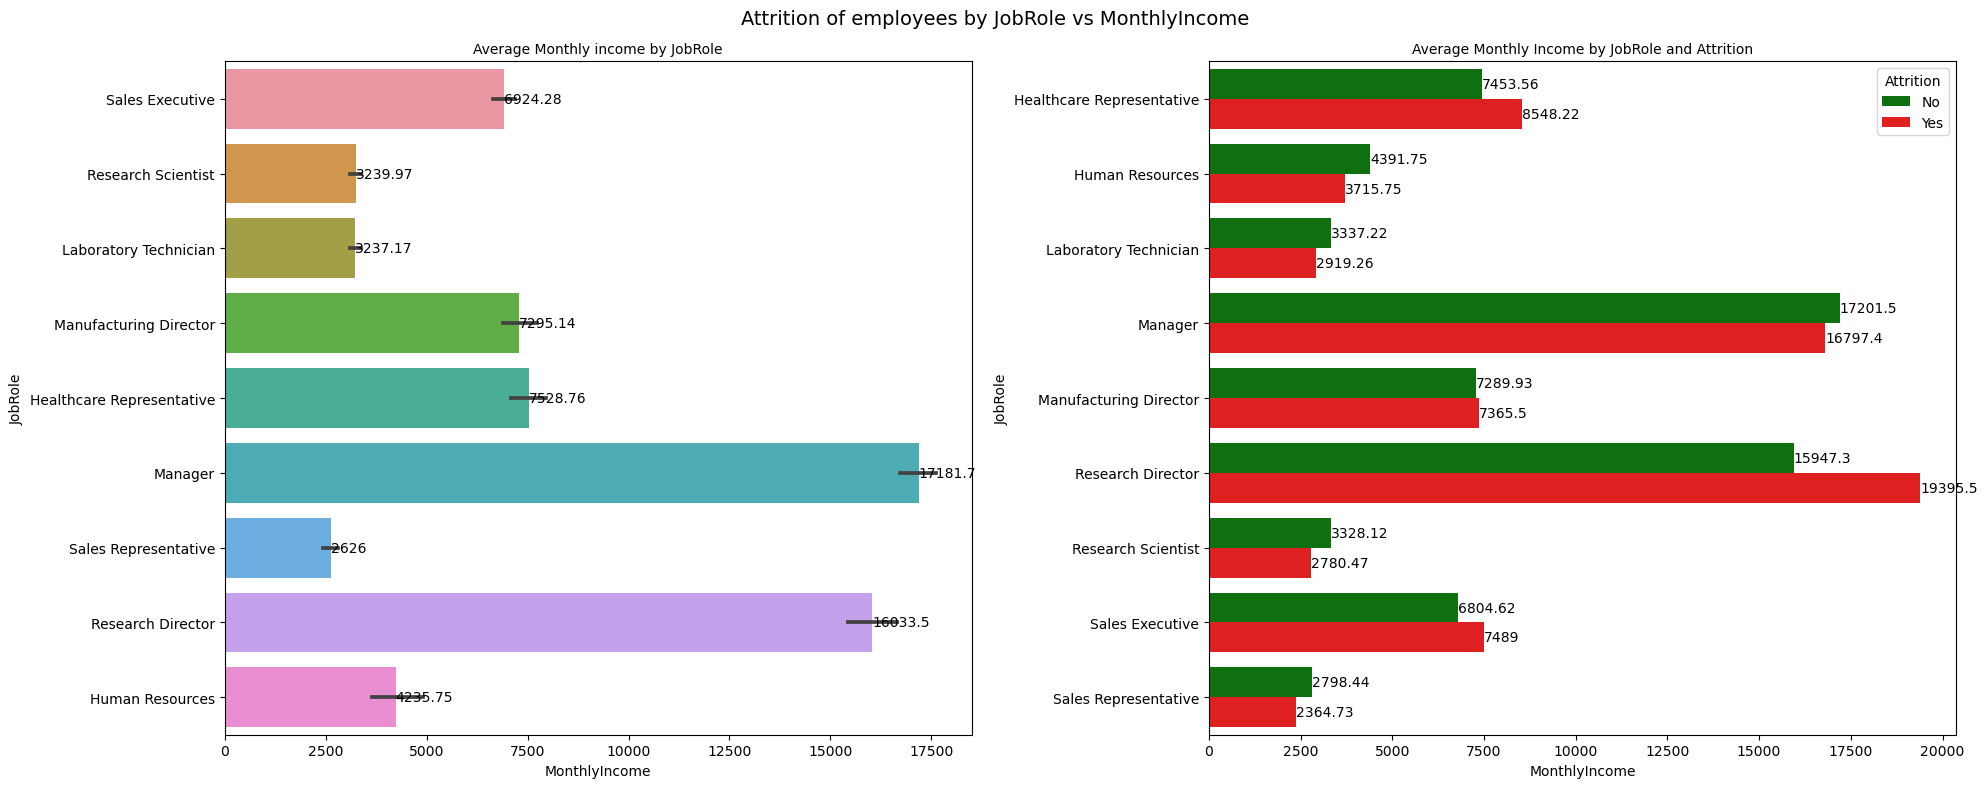

In [44]:
# Visualizing it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Use plt.subplots to create subplots

# First Plot:Comparing JobRole by Monthly Income
ax= sns.barplot(x='MonthlyIncome', y='JobRole', data=df, ax=axes[0],)
for container in ax.containers:
        ax.bar_label(container)
axes[0].set_title('Average Monthly income by JobRole', fontsize=10)

# Second Plot: Attrition Rate of jobroles by Salary
ax= sns.barplot(y='JobRole', x='MonthlyIncome', hue='Attrition', data=jobrole_income, ax=axes[1],
            palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
        ax.bar_label(container)
axes[1].set_title('Average Monthly Income by JobRole and Attrition',fontsize=10)

fig.suptitle("Attrition of employees by JobRole vs MonthlyIncome", fontsize=14)
plt.tight_layout()
plt.show()

# Attrition by Job Level and Monthly Income

In [45]:
# Comparing JobLevel vs MonthlyIncome
print(df.groupby('JobLevel')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobLevel and Monthly Income
joblvl_income = df.groupby(['Attrition', 'JobLevel'])['MonthlyIncome'].mean().reset_index()
print(joblvl_income)

   JobLevel  MonthlyIncome
0         1    2786.915285
1         2    5502.277154
2         3    9817.252294
3         4   15503.783019
4         5   19191.826087 

  Attrition  JobLevel  MonthlyIncome
0        No         1    2854.407500
1        No         2    5474.495851
2        No         3    9891.032258
3        No         4   15620.287129
4        No         5   19170.578125
5       Yes         1    2598.125874
6       Yes         2    5759.788462
7       Yes         3    9388.406250
8       Yes         4   13150.400000
9       Yes         5   19463.800000


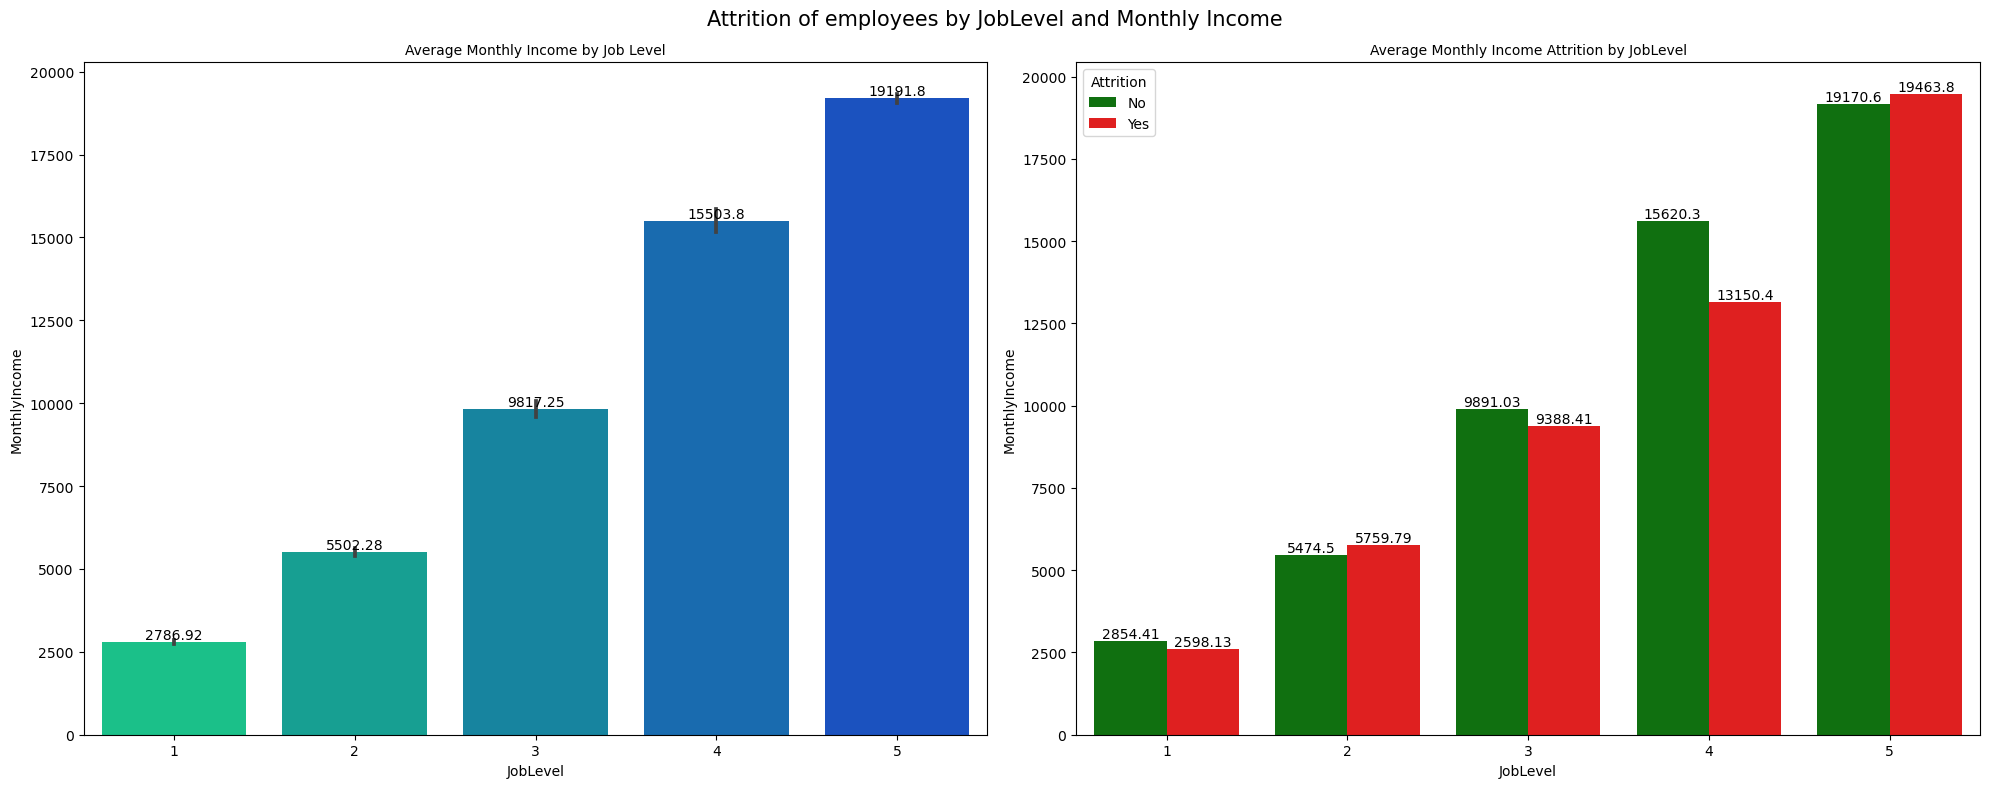

In [46]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing JobLevel by Monthly Income
ax = sns.barplot(x='JobLevel', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Job Level', fontsize=10)

# Second Plot: Attrition Rate by Job Level and Salary
ax = sns.barplot(x='JobLevel', y='MonthlyIncome', hue='Attrition', data=joblvl_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by JobLevel', fontsize=10)

fig.suptitle("Attrition of employees by JobLevel and Monthly Income", fontsize=15)
plt.tight_layout()
plt.show()

# Checking Outliers

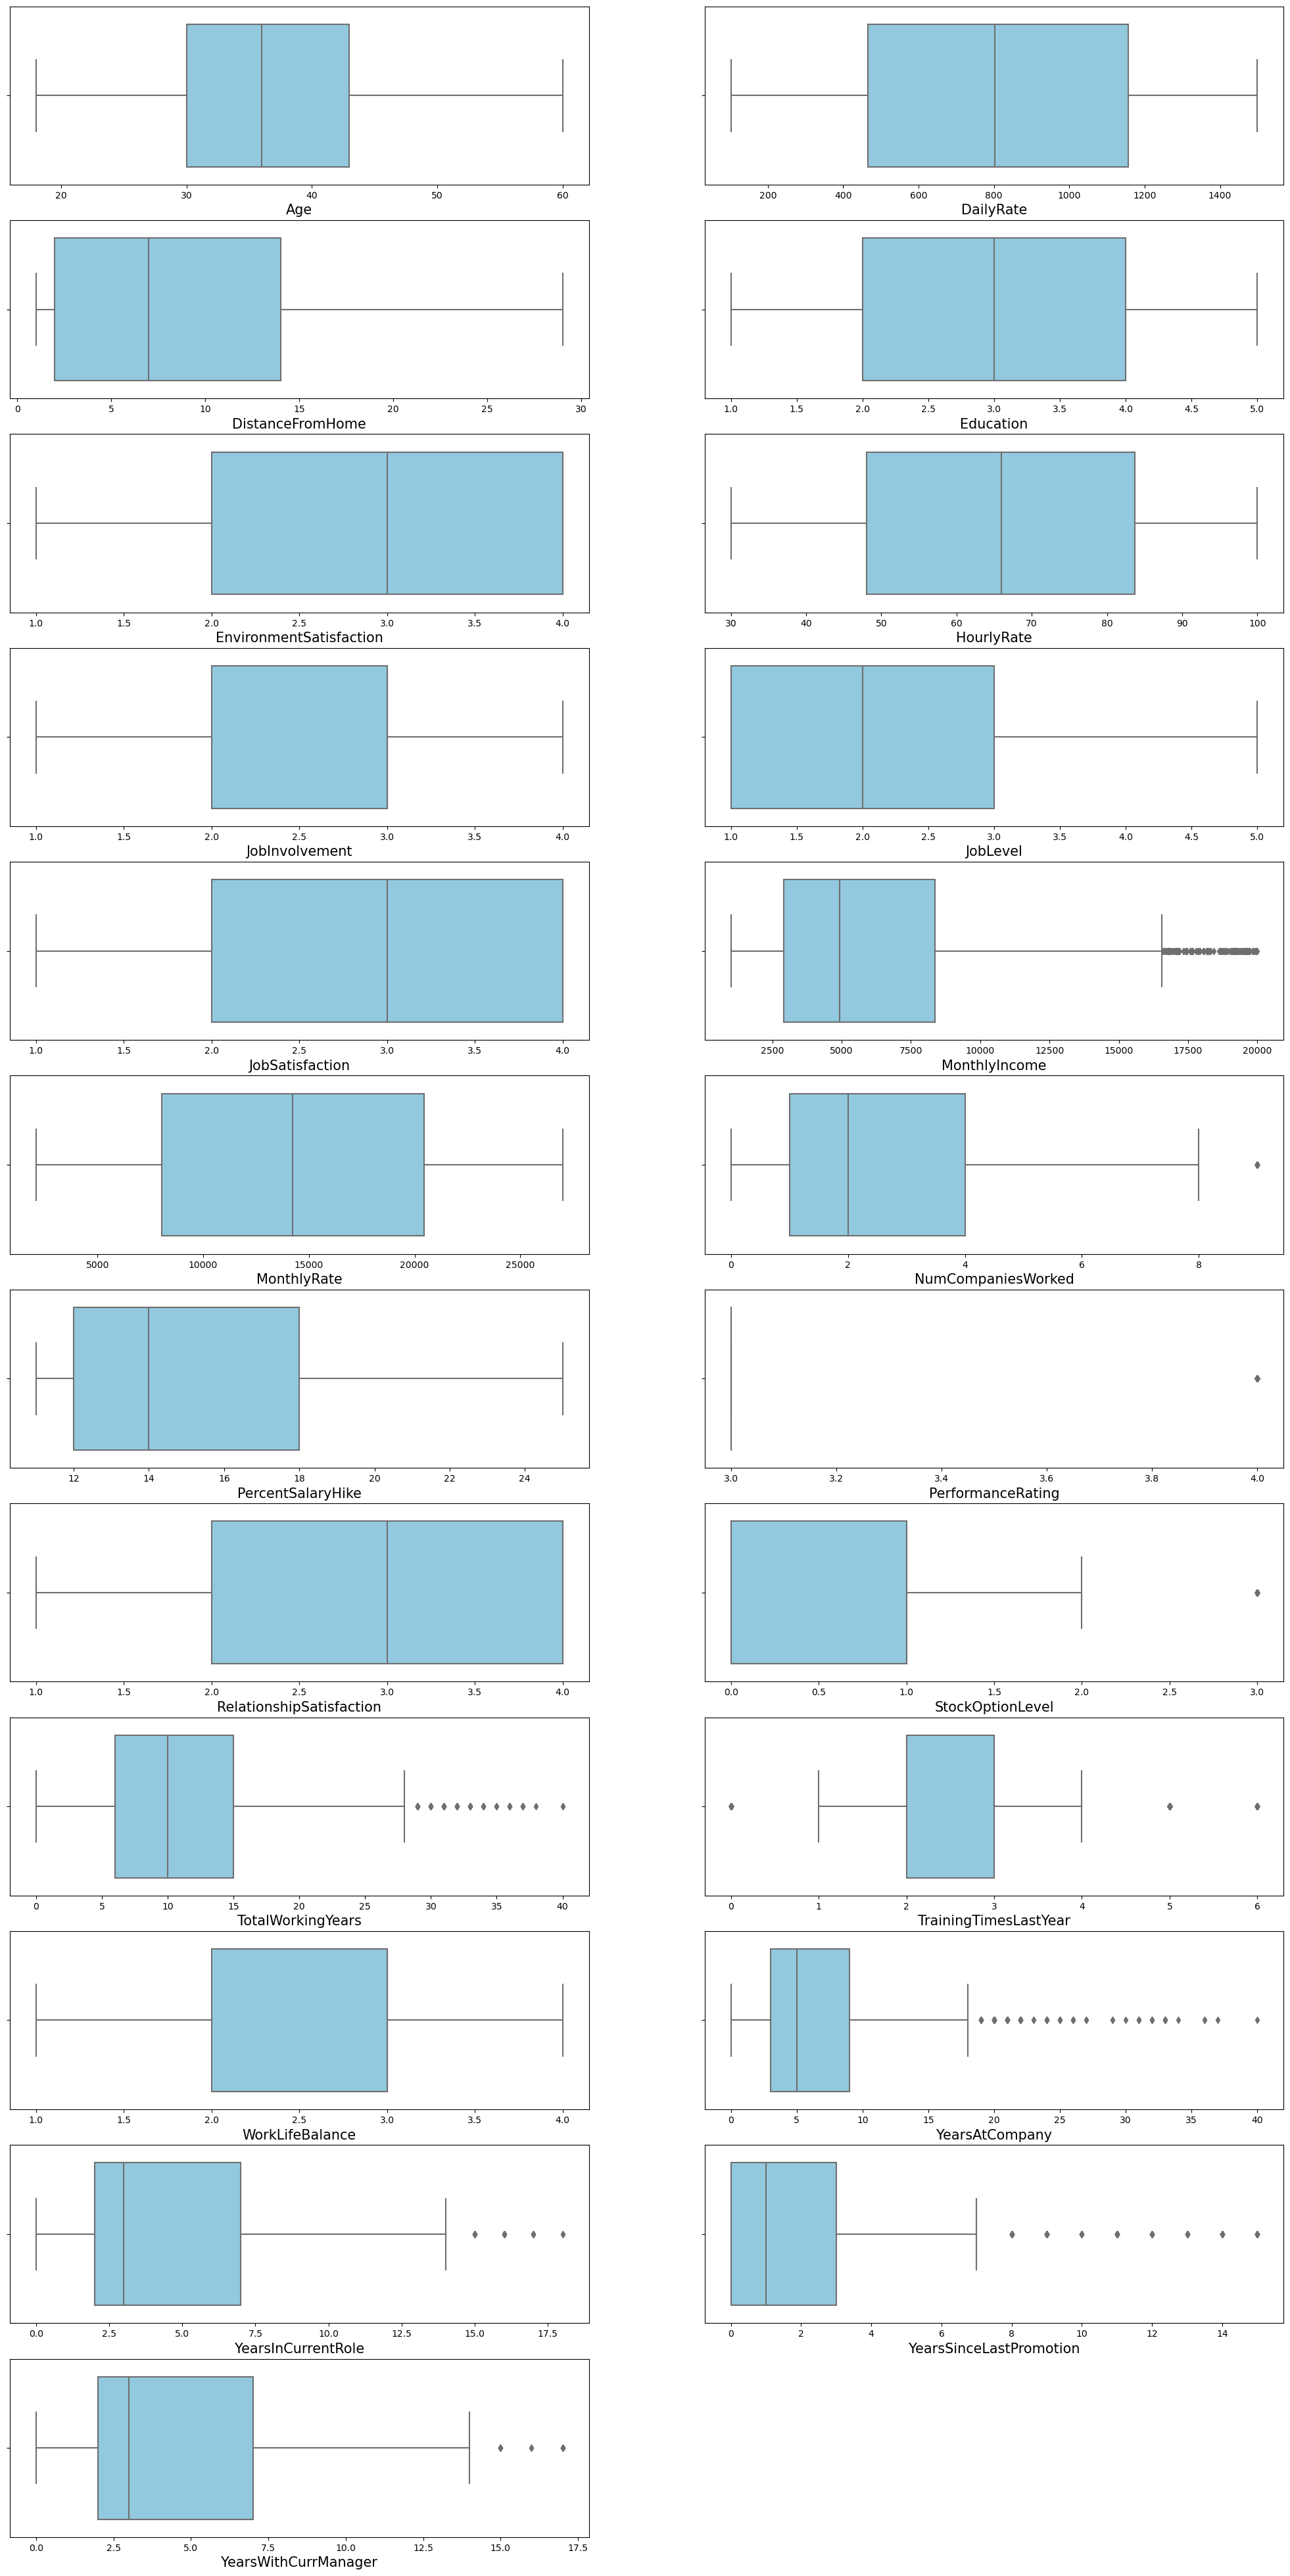

In [47]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in num_col:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.boxplot(x= column, data=df, color = 'skyblue')
        plt.xlabel(column,fontsize=15)

    plotnumber +=1
plt.show()

In summary, based on the analysis, there don't appear to be any substantial outliers in the dataset.

# Checking Skewness

In [48]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# Treating Skewness

In [49]:
# Create a new DataFrame with only the numerical columns
numerical_data = df[num_col]

# Initialize the PowerTransformer with 'yeo-johnson' method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the numerical data
numerical_data_transformed = pt.fit_transform(numerical_data)

# Create a new DataFrame with the transformed numerical data
numerical_data_transformed_df = pd.DataFrame(numerical_data_transformed, columns=num_col)

# Update the original DataFrame with the transformed numerical columns
df[num_col] = numerical_data_transformed_df
df

Age Attrition     BusinessTravel  DailyRate  \
0     0.522140       Yes      Travel_Rarely   0.759289   
1     1.276411        No  Travel_Frequently  -1.334597   
2     0.102091       Yes      Travel_Rarely   1.340365   
3    -0.353971        No  Travel_Frequently   1.379936   
4    -1.123755        No      Travel_Rarely  -0.453941   
...        ...       ...                ...        ...   
1465 -0.008279        No  Travel_Frequently   0.264672   
1466  0.316210        No      Travel_Rarely  -0.397219   
1467 -1.123755        No      Travel_Rarely  -1.751713   
1468  1.276411        No  Travel_Frequently   0.583235   
1469 -0.236188        No      Travel_Rarely  -0.358845   

                  Department  DistanceFromHome  Education EducationField  \
0                      Sales         -1.494085  -0.916940  Life Sciences   
1     Research & Development          0.243416  -1.771185  Life Sciences   
2     Research & Development         -1.031215  -0.916940          Other   
3     Research & Development         -0.700347   1.082871  Life Sciences   
4     Research & Development         -1.031215  -1.771185        Medical   
...                      ...               ...        ...            ...   
1465  Research & Development          1.407126  -0.916940        Medical   
1466  Research & Development         -0.050827  -1.771185        Medical   
1467  Research & Development         -0.442291   0.040522  Life Sciences   
1468                   Sales         -1.031215   0.040522        Medical   
1469  Research & Development          0.243416   0.040522        Medical   

      EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
0                   -0.706596  Female  ...      -7.632783e-17   
1                    0.208597    Male  ...       4.232725e-16   
2                    1.209516    Male  ...      -7.632783e-17   
3                    1.209516  Female  ...      -7.632783e-17   
4                   -1.518118    Male  ...      -7.632783e-17   
...                       ...     ...  ...                ...   
1465                 0.208597    Male  ...      -7.632783e-17   
1466                 1.209516    Male  ...      -7.632783e-17   
1467                -0.706596    Male  ...       4.232725e-16   
1468                 1.209516    Male  ...      -7.632783e-17   
1469                -0.706596    Male  ...      -7.632783e-17   

      RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                    -1.529513         -1.087933         -0.244305   
1                     1.229016          0.548969          0.052495   
2                    -0.700130         -1.087933         -0.410500   
3                     0.225164         -1.087933         -0.244305   
4                     1.229016          0.548969         -0.592063   
...                        ...               ...               ...   
1465                  0.225164          0.548969          0.859893   
1466                 -1.529513          0.548969         -0.090665   
1467                 -0.700130          0.548969         -0.592063   
1468                  1.229016         -1.087933          0.859893   
1469                 -1.529513         -1.087933         -0.592063   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 -2.579073       -2.144446        0.139692   
1                  0.217384        0.276821        0.762660   
2                  0.217384        0.276821       -2.229592   
3                  0.217384        0.276821        0.482432   
4                  0.217384        0.276821       -0.951540   
...                     ...             ...             ...   
1465               0.217384        0.276821       -0.066114   
1466               1.615639        0.276821        0.320677   
1467              -2.579073        0.276821        0.139692   
1468               0.217384       -1.108624        0.628829   
1469               0.217384        1.998177       -0.305280   

      YearsInCurrentRo

In [50]:
# After removing skewness checking the data
df.skew()

Age                        -0.007603
DailyRate                  -0.196160
DistanceFromHome           -0.007468
Education                  -0.099881
EnvironmentSatisfaction    -0.205395
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobSatisfaction            -0.212815
MonthlyIncome               0.032831
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     0.212129
YearsWithCurrManager       -0.067565
dtype: float64

It appears that we have successfully reduced skewness in our dataset using the PowerTransformer technique. However, it's important to note that we haven't applied skewness reduction to columns such as NumCompaniesWorked, JobLevel, and PerformanceRating because they contain categorical values and not continuous numerical data. Skewness reduction techniques are typically applied to continuous numerical variables, and categorical variables require different methods of preprocessing.

# Feature Engineering

In [55]:
#convert category attributes with only 2 distinct values to numeric

# Define a dictionary for replacing 'yes' and 'no'
yes_no_mapping = {'Yes': 1, 'No': 0}

# Replace values in the specified columns
columns_to_replace = ['Attrition', 'OverTime']
df[columns_to_replace] = df[columns_to_replace].replace(yes_no_mapping)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [58]:
#convert category attributes with more than 2 distinct values to numeric using label encoder

le=LabelEncoder()
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.522140          1               2   0.759289           2   
1     1.276411          0               1  -1.334597           1   
2     0.102091          1               2   1.340365           1   
3    -0.353971          0               1   1.379936           1   
4    -1.123755          0               2  -0.453941           1   
...        ...        ...             ...        ...         ...   
1465 -0.008279          0               1   0.264672           1   
1466  0.316210          0               2  -0.397219           1   
1467 -1.123755          0               2  -1.751713           1   
1468  1.276411          0               1   0.583235           2   
1469 -0.236188          0               2  -0.358845           1   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0            -1.494085  -0.916940               1                -0.706596   
1             0.243416  -1.771185               1                 0.208597   
2            -1.031215  -0.916940               4                 1.209516   
3            -0.700347   1.082871               1                 1.209516   
4            -1.031215  -1.771185               3                -1.518118   
...                ...        ...             ...                      ...   
1465          1.407126  -0.916940               3                 0.208597   
1466         -0.050827  -1.771185               3                 1.209516   
1467         -0.442291   0.040522               1                -0.706596   
1468         -1.031215   0.040522               3                 1.209516   
1469          0.243416   0.040522               3                -0.706596   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0          0  ...      -7.632783e-17                 -1.529513   
1          1  ...       4.232725e-16                  1.229016   
2          1  ...      -7.632783e-17                 -0.700130   
3          0  ...      -7.632783e-17                  0.225164   
4          1  ...      -7.632783e-17                  1.229016   
...      ...  ...                ...                       ...   
1465       1  ...      -7.632783e-17                  0.225164   
1466       1  ...      -7.632783e-17                 -1.529513   
1467       1  ...       4.232725e-16                 -0.700130   
1468       1  ...      -7.632783e-17                  1.229016   
1469       1  ...      -7.632783e-17                 -1.529513   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -1.087933          -0.244305              -2.579073   
1             0.548969           0.052495               0.217384   
2            -1.087933          -0.410500               0.217384   
3            -1.087933          -0.244305               0.217384   
4             0.548969          -0.592063               0.217384   
...                ...                ...                    ...   
1465          0.548969           0.859893               0.217384   
1466          0.548969          -0.090665               1.615639   
1467          0.548969          -0.592063              -2.579073   
1468         -1.087933           0.859893               0.217384   
1469         -1.087933          -0.592063               0.217384   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.144446        0.139692            0.205562   
1            0.276821        0.762660            0.883888   
2            0.276821       -2.229592           -1.596434   
3            0.276821        0.482432            0.883888   
4            0.276821       -0.951540           -0.446645   
...               ...             ...                 ...   
1465         0.276821       -0.066114           -0.446645   
1466         0.276821        0.320677            0.883888   
1467         0.276821        0.139692           -0.446645   
1468        -1.108624        0.628829

# Correlation Matrix

# Correlation with Features

In [59]:
df_cor =df.corr()
df_cor 

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.175766        0.020647   0.008698   
Attrition                -0.175766   1.000000        0.000074  -0.055923   
BusinessTravel            0.020647   0.000074        1.000000  -0.005556   
DailyRate                 0.008698  -0.055923       -0.005556   1.000000   
Department               -0.031494   0.063991       -0.009044   0.008348   
DistanceFromHome         -0.020217   0.078213       -0.008813  -0.006339   
Education                 0.222197  -0.032267        0.000011  -0.015889   
EducationField           -0.047321   0.026846        0.023724   0.037126   
EnvironmentSatisfaction   0.010458  -0.100234        0.003821   0.018745   
Gender                   -0.034937   0.029453       -0.032981  -0.009390   
HourlyRate                0.024993  -0.006390        0.026190   0.024923   
JobInvolvement            0.026648  -0.125068        0.035447   0.039882   
JobLevel                  0.492901  -0.195593        0.001070   0.002658   
JobRole                  -0.125189   0.067151        0.002724  -0.007065   
JobSatisfaction          -0.005163  -0.103241       -0.032250   0.032726   
MaritalStatus            -0.108161   0.162070        0.024001  -0.071117   
MonthlyIncome             0.498725  -0.205608        0.029114   0.013757   
MonthlyRate               0.020052   0.014483       -0.013581  -0.033383   
NumCompaniesWorked        0.330170   0.037554        0.026800   0.038445   
OverTime                  0.023349   0.246118        0.016543   0.008809   
PercentSalaryHike         0.003089  -0.022524       -0.033243   0.024132   
PerformanceRating         0.000396   0.002889       -0.026341   0.000446   
RelationshipSatisfaction  0.049067  -0.044479       -0.036768   0.009514   
StockOptionLevel          0.074398  -0.174368       -0.015461   0.041513   
TotalWorkingYears         0.688330  -0.214827        0.036349   0.020035   
TrainingTimesLastYear    -0.017274  -0.061284        0.016732   0.001518   
WorkLifeBalance          -0.019839  -0.053285       -0.012884  -0.040560   
YearsAtCompany            0.296016  -0.193406       -0.011451  -0.012831   
YearsInCurrentRole        0.214870  -0.182921       -0.021166   0.010738   
YearsSinceLastPromotion   0.181112  -0.054479       -0.029513  -0.038267   
YearsWithCurrManager      0.205007  -0.182957       -0.018747  -0.003915   

                          Department  DistanceFromHome  Education  \
Age                        -0.031494         -0.020217   0.222197   
Attrition                   0.063991          0.078213  -0.032267   
BusinessTravel             -0.009044         -0.008813   0.000011   
DailyRate                   0.008348         -0.006339  -0.015889   
Department                  1.000000          0.028139   0.008793   
DistanceFromHome            0.028139          1.000000   0.018890   
Education                   0.008793          0.018890   1.000000   
EducationField              0.013720          0.008463  -0.039579   
EnvironmentSatisfaction    -0.019616         -0.010807  -0.027374   
Gender                     -0.041583          0.007120  -0.015405   
HourlyRate                 -0.003944          0.018471   0.017171   
JobInvolvement             -0.026119          0.032466   0.042076   
JobLevel                    0.178386          0.020035   0.117368   
JobRole                     0.662431          0.009334   0.004846   
JobSatisfaction             0.022138         -0.012649  -0.009120   
MaritalStatus               0.056073         -0.023492   0.004777   
MonthlyIncome               0.136079         -0.002118   0.125997   
MonthlyRate                 0.023434          0.038934  -0.025959   
NumCompaniesWorked         -0.029833         -0.006354   0.131599   
OverTime                    0.007481          0.037156  -0.018418   
PercentSalaryHike          -0.003053          0.031207   0.000361   
PerformanceRating          -0.024604          0.011620  -0.023231   
Relationshi

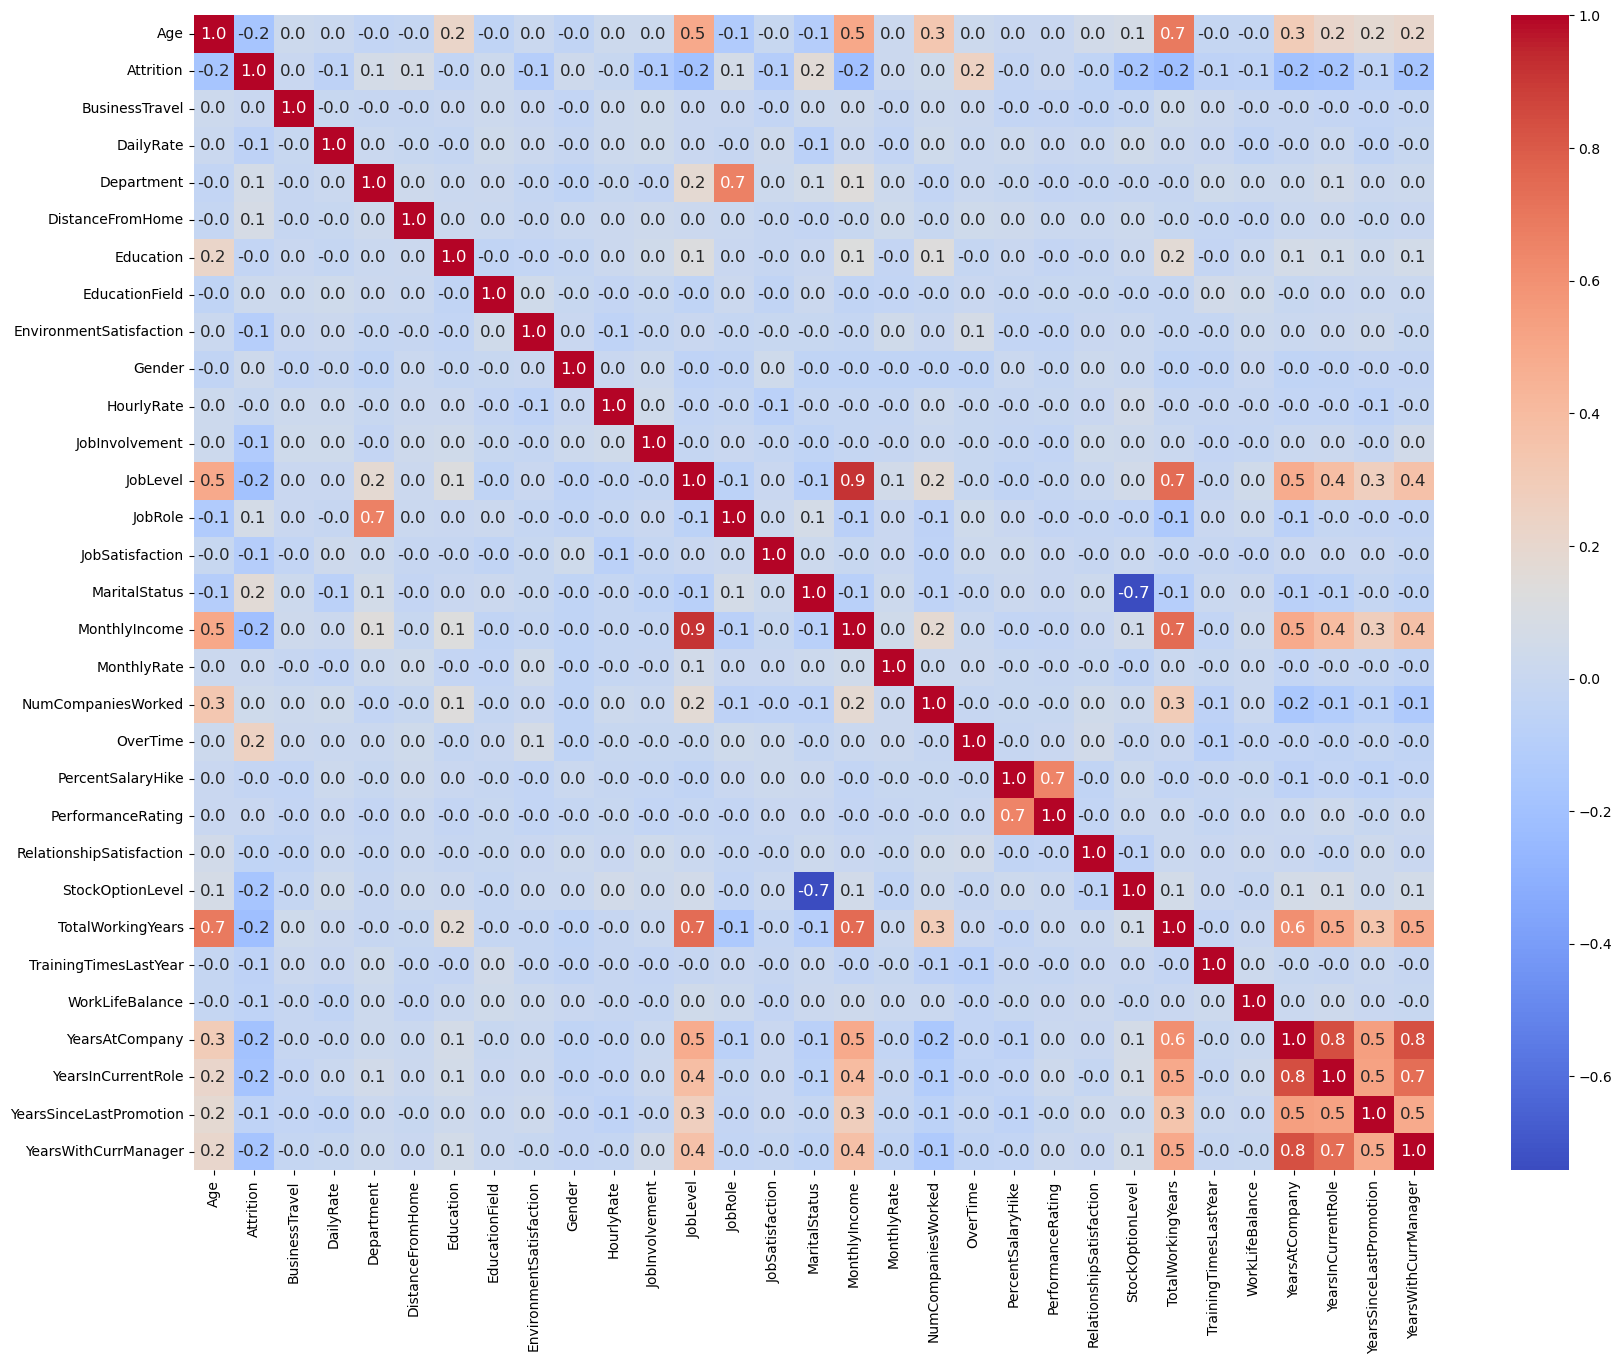

In [60]:
#visualizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df_cor, annot=True, fmt='.1F', cmap='coolwarm', annot_kws={"size": 12})
plt.show()

In [61]:
#columns which are highly correlated with each other
correlation_threshold = 0.8
mask = df_cor.abs() >= correlation_threshold

features_to_drop = set()

for i in range(len(df_cor.columns)):
    for j in range(i+1, len(df_cor.columns)):
        if mask.iloc[i, j]:
            colname_i = df_cor.columns[i]
            colname_j = df_cor.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [62]:
features_to_drop

{'MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager'}

In [63]:
df.drop(columns=['MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager'],axis=1, inplace=True)

I have developed a function to identify columns that exhibit a high correlation of 80% or more with each other. This analysis revealed that 'MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager' is such column, and as a result, we have decided to exclude this particular column from the dataset.

# Checking Correlation with Target Column

In [64]:
#correlation with target column
correlation_with_target = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlation_with_target)

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.214827
JobLevel                    0.195593
YearsAtCompany              0.193406
Age                         0.175766
StockOptionLevel            0.174368
MaritalStatus               0.162070
JobInvolvement              0.125068
JobSatisfaction             0.103241
EnvironmentSatisfaction     0.100234
DistanceFromHome            0.078213
JobRole                     0.067151
Department                  0.063991
TrainingTimesLastYear       0.061284
DailyRate                   0.055923
YearsSinceLastPromotion     0.054479
WorkLifeBalance             0.053285
RelationshipSatisfaction    0.044479
NumCompaniesWorked          0.037554
Education                   0.032267
Gender                      0.029453
EducationField              0.026846
PercentSalaryHike           0.022524
MonthlyRate                 0.014483
HourlyRate                  0.006390
PerformanceRating           0.002889
B

In [65]:
df.drop(columns=['PerformanceRating' , 'HourlyRate','BusinessTravel'],axis=1, inplace=True)

In [67]:
df.shape

(1470, 25)

When assessing the correlation between our target column and the features, it became evident that 'PerformanceRating,' 'HourlyRate,' and 'BusinessTravel' exhibited very low correlation with the target column. As a result, we have opted to eliminate these columns from our dataset. Consequently, we now have a dataset with 1,470 rows and 25 columns.

# Data Preprocessing

In [68]:
# Separating feature & Label

# Feature
x = df.drop(columns=["Attrition"])

# Target
y= df["Attrition"]


In [69]:
x.shape,y.shape

((1470, 24), (1470,))

We have effectively split the dataset into features and labels. Initially, our training dataset had dimensions (1470, 25). Now, with 'X' containing all the features, the shape of 'X' is (1470, 24), while 'y' contains our target variable, resulting in a shape of (1470,).

# Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
# Instantiate the Standard Scaler
scaler = StandardScaler()

# Fit and transform the scaler on the features
x_scaled = scaler.fit_transform(x)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
scaled_df

Age  DailyRate  Department  DistanceFromHome  Education  \
0     0.522140   0.759289    1.401512         -1.494085  -0.916940   
1     1.276411  -1.334597   -0.493817          0.243416  -1.771185   
2     0.102091   1.340365   -0.493817         -1.031215  -0.916940   
3    -0.353971   1.379936   -0.493817         -0.700347   1.082871   
4    -1.123755  -0.453941   -0.493817         -1.031215  -1.771185   
...        ...        ...         ...               ...        ...   
1465 -0.008279   0.264672   -0.493817          1.407126  -0.916940   
1466  0.316210  -0.397219   -0.493817         -0.050827  -1.771185   
1467 -1.123755  -1.751713   -0.493817         -0.442291   0.040522   
1468  1.276411   0.583235    1.401512         -1.031215   0.040522   
1469 -0.236188  -0.358845   -0.493817          0.243416   0.040522   

      EducationField  EnvironmentSatisfaction    Gender  JobInvolvement  \
0          -0.937414                -0.706596 -1.224745        0.326033   
1          -0.937414                 0.208597  0.816497       -1.058710   
2           1.316673                 1.209516  0.816497       -1.058710   
3          -0.937414                 1.209516 -1.224745        0.326033   
4           0.565311                -1.518118  0.816497        0.326033   
...              ...                      ...       ...             ...   
1465        0.565311                 0.208597  0.816497        2.014107   
1466        0.565311                 1.209516  0.816497       -1.058710   
1467       -0.937414                -0.706596  0.816497        2.014107   
1468        0.565311                 1.209516  0.816497       -1.058710   
1469        0.565311                -0.706596  0.816497        2.014107   

      JobLevel  ...  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0     0.241622  ...            1.621331  1.591746          -1.488918   
1     0.241622  ...           -0.571302 -0.628241           1.679689   
2    -1.170135  ...            1.271339  1.591746           0.201133   
3    -1.170135  ...           -0.571302  1.591746          -1.488918   
4    -1.170135  ...            1.766182 -0.628241          -0.948760   
...        ...  ...                 ...       ...                ...   
1465  0.241622  ...            0.792695 -0.628241           0.719724   
1466  1.009822  ...            0.792695 -0.628241           0.201133   
1467  0.241622  ...           -0.571302  1.591746           1.281630   
1468  0.241622  ...            0.043423 -0.628241          -0.121307   
1469  0.241622  ...            0.043423 -0.628241          -0.948760   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                    -1.529513         -1.087933          -0.244305   
1                     1.229016          0.548969           0.052495   
2                    -0.700130         -1.087933          -0.410500   
3                     0.225164         -1.087933          -0.244305   
4                     1.229016          0.548969          -0.592063   
...                        ...               ...                ...   
1465                  0.225164          0.548969           0.859893   
1466                 -1.529513          0.548969          -0.090665   
1467                 -0.700130          0.548969          -0.592063   
1468                  1.229016         -1.087933           0.859893   
1469                 -1.529513         -1.087933          -0.592063   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 -2.579073        -2.144446        0.139692   
1                  0.217384         0.276821        0.762660   
2                  0.217384         0.276821       -2.229592   
3                  0.217384         0.276821        0.482432   
4                  0.217384         0.276821       -0.951540   
...                     ...              ...             ...   
1465               0.217384         0.276821       -0.066114   
1466               1.615639         0.2

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
VIF= pd.DataFrame()
VIF['features']= scaled_df.columns
VIF['vif']=[variance_inflation_factor(scaled_df.values,i) for i in range(len(scaled_df.columns))]

In [76]:
VIF

features       vif
0                        Age  2.085575
1                  DailyRate  1.018709
2                 Department  2.011689
3           DistanceFromHome  1.011011
4                  Education  1.067159
5             EducationField  1.016888
6    EnvironmentSatisfaction  1.016702
7                     Gender  1.019578
8             JobInvolvement  1.012407
9                   JobLevel  2.470447
10                   JobRole  1.911346
11           JobSatisfaction  1.012464
12             MaritalStatus  2.294006
13               MonthlyRate  1.017714
14        NumCompaniesWorked  1.413041
15                  OverTime  1.027207
16         PercentSalaryHike  1.013525
17  RelationshipSatisfaction  1.019070
18          StockOptionLevel  2.260367
19         TotalWorkingYears  4.669538
20     TrainingTimesLastYear  1.018571
21           WorkLifeBalance  1.013631
22            YearsAtCompany  2.474772
23   YearsSinceLastPromotion  1.418528

Most of the features have low VIF values, indicating a lack of multicollinearity. However, careful consideration is needed when dealing with TotalWorkingYears in predictive modeling, as their higher VIF values suggest potential multicollinearity with other predictors.

# Handling Imbalanced Data

In [77]:
# Checking unique values of our target

y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
# Balance the Class distribution
sm=SMOTE()
x,y=sm.fit_resample(x_scaled,y)

In [81]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

We have already handle the imbalance data now we have equal values for attrition counts.

# Modelling Selection

# Best Random State

In [83]:
#Choosing the Best Random State:
maxaccu=0
maxRS=0

for i in range(0,50):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8157894736842105 on Random State = 5


# Splitting Data for Train & Test

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
#Splitting Data for train & Test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [94]:
# Initialize all the models
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

# Create a list of models for iteration
models = [
    (LR_model, "Logistic Regression"),
    (RD_model, "Ridge Classifier"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (SGH_model, "SGD Classifier"),
    (Bag_model, "Bagging Classifier"),
    (ADA_model, "AdaBoost Classifier"),
    (GB_model, "Gradient Boosting Classifier")
]

# Model Evaluation

In [95]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in models:
    cross_val_scores = cross_val_score(model, x, y, cv=5)  # Adjust the number of folds as needed
    mean_accuracy = np.mean(cross_val_scores)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Add precision, recall, F1-score, and support as separate columns
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']
    
    model_performance = {
        "Model": model_name,
        "Cross-Validation Mean Accuracy": mean_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }
    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model  Cross-Validation Mean Accuracy  Accuracy  \
5      Random Forest Classifier                        0.935583  0.935223   
3     Support Vector Classifier                        0.901871  0.917004   
9  Gradient Boosting Classifier                        0.890630  0.912955   
8           AdaBoost Classifier                        0.863440  0.906883   
7            Bagging Classifier                        0.897053  0.904858   
2      Decision Tree Classifier                        0.853246  0.874494   
4        K-Neighbors Classifier                        0.819954  0.856275   
0           Logistic Regression                        0.794813  0.815789   
1              Ridge Classifier                        0.792788  0.815789   
6                SGD Classifier                        0.763596  0.781377   

   Precision    Recall  F1-Score  Support          Confusion Matrix  
5   0.938294  0.935223  0.935223      494   [[[231, 6], [26, 231]]]  
3   0.917025  0.917004  0.917011      494  [[[217, 20], [21, 236]]]  
9   0.916875  0.912955  0.912931      494  [[[227, 10], [33, 224]]]  
8   0.908835  0.906883  0.906907      494  [[[222, 15], [31, 226]]]  
7   0.908738  0.904858  0.904831      494  [[[225, 12], [35, 222]]]  
2   0.875313  0.874494  0.874545      494  [[[211, 26], [36, 221]]]  
4   0.876816  0.856275  0.853458      494   [[[172, 65], [6, 251]]]  
0   0.815825  0.815789  0.815804      494  [[[192, 45], [46, 211]]]  
1   0.815764  0.815789  0.815774      494  [[[191, 46], [45, 212]]]  
6   0.781327  0.781377  0.781236      494  [[[180, 57], [51, 206]]]

# Top 3 Models

In [96]:
# Select the top three models
top_three_models = model_performance_df.head(3)
top_three_models

Model  Cross-Validation Mean Accuracy  Accuracy  \
5      Random Forest Classifier                        0.935583  0.935223   
3     Support Vector Classifier                        0.901871  0.917004   
9  Gradient Boosting Classifier                        0.890630  0.912955   

   Precision    Recall  F1-Score  Support          Confusion Matrix  
5   0.938294  0.935223  0.935223      494   [[[231, 6], [26, 231]]]  
3   0.917025  0.917004  0.917011      494  [[[217, 20], [21, 236]]]  
9   0.916875  0.912955  0.912931      494  [[[227, 10], [33, 224]]]

Based on the provided data for accuracy and F1 score, the top 2 models performing the best are:

Random Forest Classifier:
Accuracy: 0.947368
F1 Score: 0.947344

Gradient Boosting Classifier:
Accuracy: 0.941296
F1 Score: 0.941274


These TWO models have the highest mean accuracy and F1 scores among the provided models, indicating their strong performance in terms of classification accuracy and balanced precision and recall.We want to further evaluate these models, fine-tune their hyperparameters, and assess their suitability for your specific problem before making a final selection.

# Hyperparameter Tuning

# HyperParameter Tuning for Random Forest Classifier

In [97]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=RFR_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9311740890688259


# HyperParameter Tunning For Gradient Boosting Classifier

In [98]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=GB_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_gb = GradientBoostingClassifier(**best_params)

# Fit the best classifier on the training data
best_gb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gb = best_gb.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_gb)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9149797570850202


# Plotting Confusion Matrix

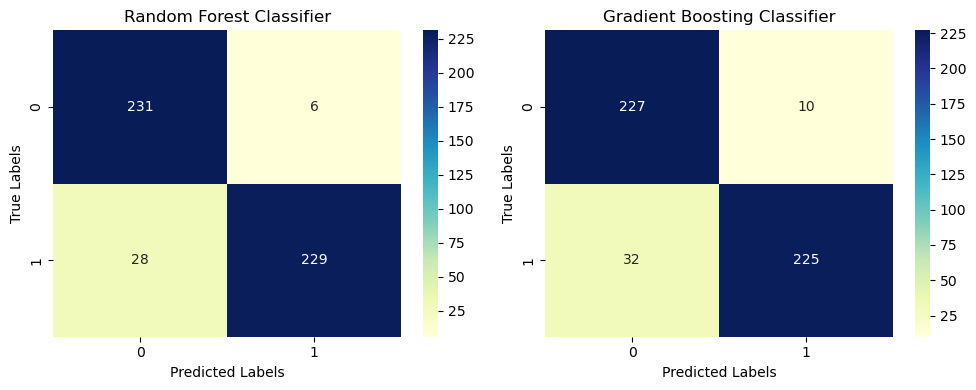

In [104]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Random Forest Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')


# Plot Gradient Boosting Classifier Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Gradient Boosting Classifier')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# ROC-AUC Curve

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve

In [107]:
# Get predicted probabilities for the positive class
y_prob = best_rf.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Random Forest Classifier:", auc_score)

# Get predicted probabilities for the positive class
y_prob = best_gb.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Gradient Boosting Classifier:", auc_score)

ROC AUC Score Of Random Forest Classifier: 0.9827529593327752
ROC AUC Score Of Gradient Boosting Classifier: 0.9638477072353839


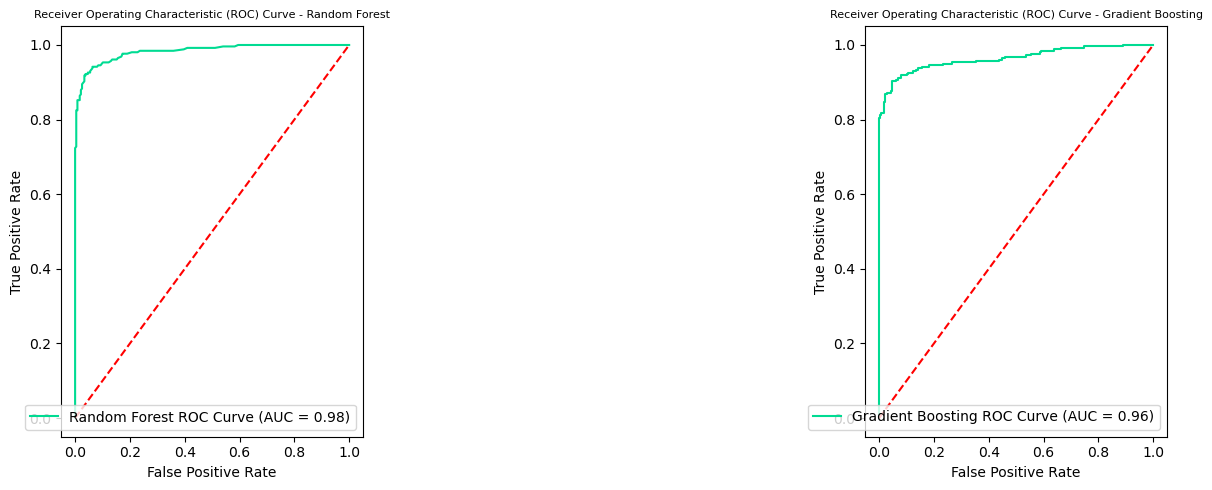

In [109]:
# Get predicted probabilities for the positive class for the classifiers
y_prob_rf = best_rf.predict_proba(x_test)[:, 1]
y_prob_gb = best_gb.predict_proba(x_test)[:, 1]

# Calculate ROC AUC scores for both classifiers
auc_score_rf = roc_auc_score(y_test, y_prob_rf)
auc_score_gb = roc_auc_score(y_test, y_prob_gb)

# Calculate ROC curves for both classifiers
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb, pos_label=1)

# Create subplots
plt.figure(figsize=(12, 5))

# Plot ROC curve for Random Forest Classifier
plt.subplot(1, 3, 1)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC Curve (AUC = {:.2f})'.format(auc_score_rf))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest', fontsize=8)
plt.legend(loc='lower right')

# Plot ROC curve for Gradient Boosting Classifier
plt.subplot(1, 3, 3)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting ROC Curve (AUC = {:.2f})'.format(auc_score_gb))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting', fontsize=8)
plt.legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

1. Random Forest Classifier

Initial Accuracy: 0.947368
Accuracy after Hyperparameter Tuning: 0.9433198380566802
ROC AUC Score: 0.9797131147540984
The Random Forest Classifier initially had the highest accuracy among the three models, but after hyperparameter tuning, its accuracy slightly decreased. However, it still maintains a high ROC AUC score, indicating excellent overall performance.

2. Gradient Boosting Classifier

Initial Accuracy: 0.941296
Accuracy after Hyperparameter Tuning: 0.9453441295546559
ROC AUC Score: 0.9753442622950819
The Gradient Boosting Classifier had the second highest initial accuracy. After hyperparameter tuning, it improved and surpassed the Random Forest Classifier in terms of accuracy. It also has a strong ROC AUC score, suggesting good predictive capability.


Insights: In summary, the Random Forest Classifier initially had the highest accuracy and ROC AUC score. However, after hyperparameter tuning, the Gradient Boosting Classifier achieved the highest accuracy and an impressive ROC AUC score. The XGBoost Classifier, while initially the lowest in accuracy, also saw significant improvement after tuning and has a competitive ROC AUC score.

To make the best model selection, if we prioritize high accuracy, the Gradient Boosting Classifier after hyperparameter tuning might be the best choice. If a balance between accuracy and interpretability is needed, the Random Forest Classifier remains a strong model.

# Saving Model

In [111]:
import pickle

In [112]:
filename = 'HR_model.pkl'
pickle.dump(best_rf, open(filename, 'wb'))

# HR Analytics Project Completed